Details given in the project- This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Task given in  the project- You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. It has to do with classification of the variables in the loan_status column.

Below are the steps we have to follow for the solution-

lets import all the packages we need inorder to do eda, non-visual and visual data analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import *
import statsmodels.api as sm
import networkx as nx
import requests
from flask import Flask
import sqlalchemy
import pytest
import tkinter as tk
import openpyxl

now lets upload the database from the url and create a dataframe from it. we will be using the try and except block in order to parse the data which using a delimiter=; and skipping rows at 32 in order to upload the csv file since the database has the similar format.

In [2]:
url = 'https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv'
try:
    loan_data = pd.read_csv(url, delimiter=';')
    print(loan_data)
except pd.errors.ParserError:
    loan_data = pd.read_csv(url, skiprows=32)  
    print(loan_data)

    Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0    LP001002,Male,No,0,Graduate,No,5849,0,,360,1,U...                                                                                                              
1    LP001003,Male,Yes,1,Graduate,No,4583,1508,128,...                                                                                                              
2    LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360...                                                                                                              
3    LP001006,Male,Yes,0,Not Graduate,No,2583,2358,...                                                                                                              
4    LP001008,Male,No,0,Graduate,No,6000,0,141,360,...                                                                                                              
..        

Lets assign the header names to the columns in the dataframe since the database has not classified in its format.

In [3]:
loan_data = pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv', header=None, skiprows=1)
loan_data.columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
print(loan_data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

lets get the first 30 values from the dataframe

In [6]:
loan_data.head(30)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001002    Male      No          0      Graduate            No   
1   LP001003    Male     Yes          1      Graduate            No   
2   LP001005    Male     Yes          0      Graduate           Yes   
3   LP001006    Male     Yes          0  Not Graduate            No   
4   LP001008    Male      No          0      Graduate            No   
5   LP001011    Male     Yes          2      Graduate           Yes   
6   LP001013    Male     Yes          0  Not Graduate            No   
7   LP001014    Male     Yes         3+      Graduate            No   
8   LP001018    Male     Yes          2      Graduate            No   
9   LP001020    Male     Yes          1      Graduate            No   
10  LP001024    Male     Yes          2      Graduate            No   
11  LP001027    Male     Yes          2      Graduate           NaN   
12  LP001028    Male     Yes          2      Graduate            No   
13  LP001029    Male      No          0      Graduate            No   
14  LP001030    Male     Yes          2      Graduate            No   
15  LP001032    Male      No          0      Graduate            No   
16  LP001034    Male      No          1  Not Graduate            No   
17  LP001036  Female      No          0      Graduate            No   
18  LP001038    Male     Yes          0  Not Graduate            No   
19  LP001041    Male     Yes          0      Graduate           NaN   
20  LP001043    Male     Yes          0  Not Graduate            No   
21  LP001046    Male     Yes          1      Graduate            No   
22  LP001047    Male     Yes          0  Not Graduate            No   
23  LP001050     NaN     Yes          2  Not Graduate            No   
24  LP001052    Male     Yes          1      Graduate           NaN   
25  LP001066    Male     Yes          0      Graduate           Yes   
26  LP001068    Male     Yes          0      Graduate            No   
27  LP001073    Male     Yes          2  Not Graduate            No   
28  LP001086    Male      No          0  Not Graduate            No   
29  LP001087  Female      No          2      Graduate           NaN   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0         NaN             360.0   
1              4583             1508.0       128.0             360.0   
2              3000                0.0        66.0             360.0   
3              2583             2358.0       120.0             360.0   
4              6000                0.0       141.0             360.0   
5              5417             4196.0       267.0             360.0   
6              2333             1516.0        95.0             360.0   
7              3036             2504.0       158.0             360.0   
8              4006             1526.0       168.0             360.0   
9             12841            10968.0       349.0             360.0   
10             3200              700.0        70.0             360.0   
11             2500             1840.0       109.0             360.0   
12             3073             8106.0       200.0             360.0   
13             1853             2840.0       114.0             360.0   
14             1299             1086.0        17.0             120.0   
15             4950                0.0       125.0             360.0   
16             3596                0.0       100.0             240.0   
17             3510                0.0        76.0             360.0   
18             4887                0.0       133.0             360.0   
19             2600             3500.0       115.0               NaN   
20             7660                0.0       104.0             360.0   
21             5955             5625.0       315.0             360.0   
22             2600             1911.0       116.0             360.0   
23             3365             1917.0       112.0             360.0   
24 

now lets get the last 30 values

In [7]:
loan_data.tail(30)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
584  LP002911    Male     Yes          1      Graduate            No   
585  LP002912    Male     Yes          1      Graduate            No   
586  LP002916    Male     Yes          0      Graduate            No   
587  LP002917  Female      No          0  Not Graduate            No   
588  LP002925     NaN      No          0      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
590  LP002928    Male     Yes          0      Graduate            No   
591  LP002931    Male     Yes          2      Graduate           Yes   
592  LP002933     NaN      No         3+      Graduate           Yes   
593  LP002936    Male     Yes          0      Graduate            No   
594  LP002938    Male     Yes          0      Graduate           Yes   
595  LP002940    Male      No          0  Not Graduate            No   
596  LP002941    Male     Yes          2  Not Graduate           Yes   
597  LP002943    Male      No        NaN      Graduate            No   
598  LP002945    Male     Yes          0      Graduate           Yes   
599  LP002948    Male     Yes          2      Graduate            No   
600  LP002949  Female      No         3+      Graduate           NaN   
601  LP002950    Male     Yes          0  Not Graduate           NaN   
602  LP002953    Male     Yes         3+      Graduate            No   
603  LP002958    Male      No          0      Graduate            No   
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not Graduate            No   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
584             2787             1917.0       146.0             360.0   
585             4283             3000.0       172.0              84.0   
586             2297             1522.0       104.0             360.0   
587             2165                0.0        70.0             360.0   
588             4750                0.0        94.0             360.0   
589             2726                0.0       106.0             360.0   
590             3000             3416.0        56.0             180.0   
591             6000                0.0       205.0             240.0   
592             9357                0.0       292.0             360.0   
593             3859             3300.0       142.0             180.0   
594            16120                0.0       260.0             360.0   
595             3833                0.0       110.0             360.0   
596             6383             1000.0       187.0             360.0   
597             2987                0.0        88.0             360.0   
598             9963                0.0       180.0             360.0   
599             5780                0.0       192.0             360.0   
600              416            41667.0       350.0             180.0   
601             2894             2792.0       155.0             360.0   
602             5703                0.0       128.0             360.0   
603             3676             4301.0       172.0             360.0   
604            12000                0.0       496.0             360.0   
605             2400             3800.0         NaN             180.0   
606             3400             2500.0       173.0             360.0   
607             3987 

lets see the null values in the dataframe

In [28]:
loan_data.isnull().sum().sum()

149

In [9]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

lets fill the null values in the dataframe using the columns median, first after doing few replacements.

since the column dependents consists of of a value termed 3+ which is not numeric, we will sum it up to 3 for convencience.

In [4]:
loan_data['Dependents'] = loan_data['Dependents'].replace('3+', '3')
print(loan_data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes          3      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

now lets fill the null values in the column with the medians of theie respective columns.

In [6]:
columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
medians = loan_data[columns_to_fill].median()
loan_data[columns_to_fill] = loan_data[columns_to_fill].fillna(medians)

Now lets label encode the columns in order to get all numeric values into the dataframe.

In [5]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Gender', 'Loan_ID', 'Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    loan_data[column] = label_encoder.fit_transform(loan_data[column])

now lets check the values in the dataframe after all the conversions. these are the values in the dataframe-

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

In [13]:
loan_data.tail(30)

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
584      584       1        1          1          0              0   
585      585       1        1          1          0              0   
586      586       1        1          0          0              0   
587      587       0        0          0          1              0   
588      588       2        0          0          0              0   
589      589       1        1          2          0              1   
590      590       1        1          0          0              0   
591      591       1        1          2          0              1   
592      592       2        0         3+          0              1   
593      593       1        1          0          0              0   
594      594       1        1          0          0              1   
595      595       1        0          0          1              0   
596      596       1        1          2          1              1   
597      597       1        0        NaN          0              0   
598      598       1        1          0          0              1   
599      599       1        1          2          0              0   
600      600       0        0         3+          0              2   
601      601       1        1          0          1              2   
602      602       1        1         3+          0              0   
603      603       1        0          0          0              0   
604      604       0        1          1          0              0   
605      605       1        1          0          1              0   
606      606       1        1          1          0              0   
607      607       1        1          2          1              0   
608      608       1        1          0          0              0   
609      609       0        0          0          0              0   
610      610       1        1         3+          0              0   
611      611       1        1          1          0              0   
612      612       1        1          2          0              0   
613      613       0        0          0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
584             2787             1917.0       146.0             360.0   
585             4283             3000.0       172.0              84.0   
586             2297             1522.0       104.0             360.0   
587             2165                0.0        70.0             360.0   
588             4750                0.0        94.0             360.0   
589             2726                0.0       106.0             360.0   
590             3000             3416.0        56.0             180.0   
591             6000                0.0       205.0             240.0   
592             9357                0.0       292.0             360.0   
593             3859             3300.0       142.0             180.0   
594            16120                0.0       260.0             360.0   
595             3833                0.0       110.0             360.0   
596             6383             1000.0       187.0             360.0   
597             2987                0.0        88.0             360.0   
598             9963                0.0       180.0             360.0   
599             5780                0.0       192.0             360.0   
600              416            41667.0       350.0             180.0   
601             2894             2792.0       155.0             360.0   
602             5703                0.0       128.0             360.0   
603             3676             4301.0       172.0             360.0   
604            12000                0.0       496.0             360.0   
605             2400             3800.0       128.0             180.0   
606             3400             2500.0       173.0             360.0   
607             3987             1411.0       157.0             360.0   
608      

In [24]:
loan_data.head(30)

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0         0       1        0          0          0              0   
1         1       1        1          1          0              0   
2         2       1        1          0          0              1   
3         3       1        1          0          1              0   
4         4       1        0          0          0              0   
5         5       1        1          2          0              1   
6         6       1        1          0          1              0   
7         7       1        1         3+          0              0   
8         8       1        1          2          0              0   
9         9       1        1          1          0              0   
10       10       1        1          2          0              0   
11       11       1        1          2          0              2   
12       12       1        1          2          0              0   
13       13       1        0          0          0              0   
14       14       1        1          2          0              0   
15       15       1        0          0          0              0   
16       16       1        0          1          1              0   
17       17       0        0          0          0              0   
18       18       1        1          0          1              0   
19       19       1        1          0          0              2   
20       20       1        1          0          1              0   
21       21       1        1          1          0              0   
22       22       1        1          0          1              0   
23       23       2        1          2          1              0   
24       24       1        1          1          0              2   
25       25       1        1          0          0              1   
26       26       1        1          0          0              0   
27       27       1        1          2          1              0   
28       28       1        0          0          1              0   
29       29       0        0          2          0              2   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0       128.0             360.0   
1              4583             1508.0       128.0             360.0   
2              3000                0.0        66.0             360.0   
3              2583             2358.0       120.0             360.0   
4              6000                0.0       141.0             360.0   
5              5417             4196.0       267.0             360.0   
6              2333             1516.0        95.0             360.0   
7              3036             2504.0       158.0             360.0   
8              4006             1526.0       168.0             360.0   
9             12841            10968.0       349.0             360.0   
10             3200              700.0        70.0             360.0   
11             2500             1840.0       109.0             360.0   
12             3073             8106.0       200.0             360.0   
13             1853             2840.0       114.0             360.0   
14             1299             1086.0        17.0             120.0   
15             4950                0.0       125.0             360.0   
16             3596                0.0       100.0             240.0   
17             3510                0.0        76.0             360.0   
18             4887                0.0       133.0             360.0   
19             2600             3500.0       115.0             360.0   
20             7660                0.0       104.0             360.0   
21             5955             5625.0       315.0             360.0   
22             2600             1911.0       116.0             360.0   
23             3365             1917.0       112.0             360.0   
24             3717             2925.0       151.0             3

now lets check for null values in the dataframe again.

In [7]:
loan_data.isnull().sum().sum()

0

In [33]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

since we have no null values in the dataframe, lets check the data types of the dataframe.

In [34]:
loan_data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

We need to convert the following columns- Dependents,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,Property_Area and Loan_Status into float values.

In [8]:
loan_data['Dependents'] = loan_data['Dependents'].astype(float)

In [36]:
loan_data.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [9]:
loan_data['Loan_ID'] = loan_data['Loan_ID'].astype(float)
loan_data['Gender'] = loan_data['Gender'].astype(float)
loan_data['Married'] = loan_data['Married'].astype(float)
loan_data['Education'] = loan_data['Education'].astype(float)
loan_data['Self_Employed'] = loan_data['Self_Employed'].astype(float)
loan_data['ApplicantIncome'] = loan_data['ApplicantIncome'].astype(float)
loan_data['Property_Area'] = loan_data['Property_Area'].astype(float)
loan_data['Loan_Status'] = loan_data['Loan_Status'].astype(float)

now lets check the data types of the dataframe again.

In [10]:
loan_data.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

all the data types of the dataframe has converted into float values.

lets declare the input variables as a dataframe

In [39]:
loandata_xvariable = loan_data.iloc[:, :-1]
loandata_xvariable

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0.0     1.0      0.0         0.0        0.0            0.0   
1        1.0     1.0      1.0         1.0        0.0            0.0   
2        2.0     1.0      1.0         0.0        0.0            1.0   
3        3.0     1.0      1.0         0.0        1.0            0.0   
4        4.0     1.0      0.0         0.0        0.0            0.0   
..       ...     ...      ...         ...        ...            ...   
609    609.0     0.0      0.0         0.0        0.0            0.0   
610    610.0     1.0      1.0         3.0        0.0            0.0   
611    611.0     1.0      1.0         1.0        0.0            0.0   
612    612.0     1.0      1.0         2.0        0.0            0.0   
613    613.0     0.0      0.0         0.0        0.0            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       128.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             180.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

     Credit_History  Property_Area  
0               1.0            2.0  
1               1.0            0.0  
2               1.0            2.0  
3               1.0            2.0  
4               1.0            2.0  
..              ...            ...  
609             1.0            0.0  
610             1.0            0.0  
611             1.0            2.0  
612             1.0            2.0  
613             0.0            1.0  

[614 rows x 12 columns]

now lets declare the output variables in the dataframe.

In [40]:
loandata_yvariable = loan_data.iloc[:, -1:]
loandata_yvariable

Loan_Status
0            1.0
1            0.0
2            1.0
3            1.0
4            1.0
..           ...
609          1.0
610          1.0
611          1.0
612          1.0
613          0.0

[614 rows x 1 columns]

lets check the value counts of the out put column in the dataframe.

In [41]:
loan_data_counts = loan_data['Loan_Status'].value_counts()
print(loan_data_counts)

1.0    422
0.0    192
Name: Loan_Status, dtype: int64


lets get the description of the dataframe

In [42]:
loan_data_details =  loan_data.describe()
print(loan_data_details)

          Loan_ID      Gender     Married  Dependents   Education  \
count  614.000000  614.000000  614.000000  614.000000  614.000000   
mean   306.500000    0.838762    0.657980    0.744300    0.218241   
std    177.390811    0.421752    0.484971    1.009623    0.413389   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%    153.250000    1.000000    0.000000    0.000000    0.000000   
50%    306.500000    1.000000    1.000000    0.000000    0.000000   
75%    459.750000    1.000000    1.000000    1.000000    0.000000   
max    613.000000    2.000000    2.000000    3.000000    1.000000   

       Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count     614.000000       614.000000         614.000000  614.000000   
mean        0.237785      5403.459283        1621.245798  145.752443   
std         0.534737      6109.041673        2926.248369   84.107233   
min         0.000000       150.000000           0.000000    9.000000   
25%         0.0000

Below are the following details that we can extract from the above table-

Median of Loan_ID is(306.500000) is equal to its mean(306.500000), which means no outliers are present.

Median of Gender (1.000000) is higher than its mean(0.838762), which means few outliers are present- -vely skewed

Median of Married (1.000000) is quite higher than its mean(0.657980), which means some outliers are present- -vely skewed

Median of Dependents (0.000000) is quite lower than its mean(0.744300), which means some outliers are present- +vely skewed

Median of Education (0.000000) is quite lower than its mean(0.218241), which means few outliers are present- +ve

Median of Self_Employed (0.000000) is quite lower than its mean(0.237785), which means some outliers are present- +ve

Median of ApplicantIncome (3812.500000) is quite lower than its mean(5403.459283), which means few outliers are present- +ve

Median of CoapplicantIncome (1188.500000) is pretty lower than its mean(1621.245798), which means a lot of outliers are present- +ve

Median of LoanAmount (128.000000) is pretty lower than its mean(145.752443), which means a lot of outliers are present- +ve

Median of Loan_Amount_Term (360.000000) is higher than its mean(342.410423), which means a lot of outliers are present- -ve

Median of Credit_History (1.000000) is pretty higher than its mean(0.855049), which means a lot of outliers are present- -ve

Median of Property_Area (1.000000) is pretty lower than its mean(1.037459), which means a lot of outliers are present- +ve

Median of Loan_Status (1.000000) is pretty higher than its mean(0.687296), which means a lot of outliers are present- -ve

The total count of all columns is 614.000000 values.

The maximum values of each column are as follows:-

Loan_ID: 613.000000, iqr = 306.5

Gender: 2.000000, iqr= 0

Married: 2.000000, iqr= 1

Dependents:3.000000, iqr= 1

Education:1.000000,iqr= 0

Self_Employed:2.000000,iqr= 0

ApplicantIncome:81000.000000,iqr=2917.5

CoapplicantIncome:41667.000000,iqr=2297.25

LoanAmount:700.000000,iqr=64.50

Loan_Amount_Term:480.000000,iqr=0

Credit_History:1.000000,iqr=0

Property_Area:2.000000,iqr=2

Loan_Status:1.000000,iqr=1

lets get some information from the dataframe

In [43]:
loan_data_info = loan_data.info
print(loan_data_info)

<bound method DataFrame.info of      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0.0     1.0      0.0         0.0        0.0            0.0   
1        1.0     1.0      1.0         1.0        0.0            0.0   
2        2.0     1.0      1.0         0.0        0.0            1.0   
3        3.0     1.0      1.0         0.0        1.0            0.0   
4        4.0     1.0      0.0         0.0        0.0            0.0   
..       ...     ...      ...         ...        ...            ...   
609    609.0     0.0      0.0         0.0        0.0            0.0   
610    610.0     1.0      1.0         3.0        0.0            0.0   
611    611.0     1.0      1.0         1.0        0.0            0.0   
612    612.0     1.0      1.0         2.0        0.0            0.0   
613    613.0     0.0      0.0         0.0        0.0            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0   

lets get the absolute values in the dataframe

In [44]:
absolute_df = loan_data.abs()
print(absolute_df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0.0     1.0      0.0         0.0        0.0            0.0   
1        1.0     1.0      1.0         1.0        0.0            0.0   
2        2.0     1.0      1.0         0.0        0.0            1.0   
3        3.0     1.0      1.0         0.0        1.0            0.0   
4        4.0     1.0      0.0         0.0        0.0            0.0   
..       ...     ...      ...         ...        ...            ...   
609    609.0     0.0      0.0         0.0        0.0            0.0   
610    610.0     1.0      1.0         3.0        0.0            0.0   
611    611.0     1.0      1.0         1.0        0.0            0.0   
612    612.0     1.0      1.0         2.0        0.0            0.0   
613    613.0     0.0      0.0         0.0        0.0            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       128.0             360.0   
1

lets get the shape of the dataframe

In [45]:
loan_data.shape

(614, 13)

lets get the names of all columns in the dataframe

In [46]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

lets visualise that all these columns does not contain null values.

<Axes: >

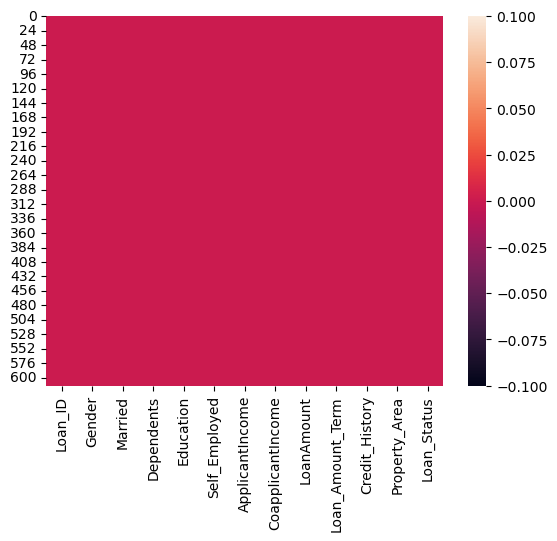

In [47]:
sns.heatmap(loan_data.isnull())

lets check the number of unique values in the dataframe

In [48]:
loan_data['Loan_Status'].unique()

array([1., 0.])

In [49]:
loan_data['Loan_Status'].nunique()

2

In [ ]:
lets get the value counts in the dataframe

In [50]:
for i in loan_data.columns:
    print(loan_data[i].value_counts())
    print("/n")

0.0      1
412.0    1
405.0    1
406.0    1
407.0    1
        ..
205.0    1
206.0    1
207.0    1
208.0    1
613.0    1
Name: Loan_ID, Length: 614, dtype: int64
/n
1.0    489
0.0    112
2.0     13
Name: Gender, dtype: int64
/n
1.0    398
0.0    213
2.0      3
Name: Married, dtype: int64
/n
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
/n
0.0    480
1.0    134
Name: Education, dtype: int64
/n
0.0    500
1.0     82
2.0     32
Name: Self_Employed, dtype: int64
/n
2500.0    9
4583.0    6
6000.0    6
2600.0    6
3333.0    5
         ..
3244.0    1
4408.0    1
3917.0    1
3992.0    1
7583.0    1
Name: ApplicantIncome, Length: 505, dtype: int64
/n
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
/n
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0

In [ ]:
below are the findings(most number of occurences) in the dataframe-

1) 1.0-489 gender
2) 1.0-398 married
3) 0.0-360 dependents
4) 0.0-480 education
5) 0.0-500 Self_Employed
6) 2500.0-9 ApplicantIncome
7) 0.0-273 CoapplicantIncome
8) 128.0-33 LoanAmount
9) 360.0-526 Loan_Amount_Term
10) 1.0-525 Credit_History
11) 1.0-233 Property_Area
12) 1.0-422 Loan_Status

lets declare a dataframe full of columns that consists of float values

In [26]:
loan_data_col=[]
for i in loan_data.dtypes.index:
    if loan_data.dtypes[i] == 'float64':
        loan_data_col.append(i)
print("loan_data_cateogry columns:", loan_data_col)
print("/n")

loan_data_cateogry columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
/n


lets declare all the columns that are free from null-values

In [52]:
loan_data.loc[loan_data["Loan_Status"]==""]

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

lets get the mean value of the dataframe 

In [53]:
print(loan_data["Loan_Status"].mean())

0.6872964169381107


lets declare all the unique values in the dataframe

In [54]:
loan_data.nunique().to_frame("No. of Unique values")

No. of Unique values
Loan_ID                             614
Gender                                3
Married                               3
Dependents                            4
Education                             2
Self_Employed                         3
ApplicantIncome                     505
CoapplicantIncome                   287
LoanAmount                          203
Loan_Amount_Term                     10
Credit_History                        2
Property_Area                         3
Loan_Status                           2

lets get the list of duplicated rows if there are any in our dataframe

In [11]:
print("Total duplicated rows:", loan_data.duplicated().sum())

Total duplicated rows: 0


Since we dont have any duplicated rows, we will move on to the visual analysis of the dataframe.

Univariate analysis

Countplots

1) 1.0-489 gender
2) 1.0-398 married
3) 0.0-360 dependents
4) 0.0-480 education
5) 0.0-500 Self_Employed
6) 2500.0-9 ApplicantIncome
7) 0.0-273 CoapplicantIncome
8) 128.0-33 LoanAmount
9) 360.0-526 Loan_Amount_Term
10) 1.0-525 Credit_History
11) 1.0-233 Property_Area
12) 1.0-422 Loan_Status

1.0    422
0.0    192
Name: Loan_Status, dtype: int64


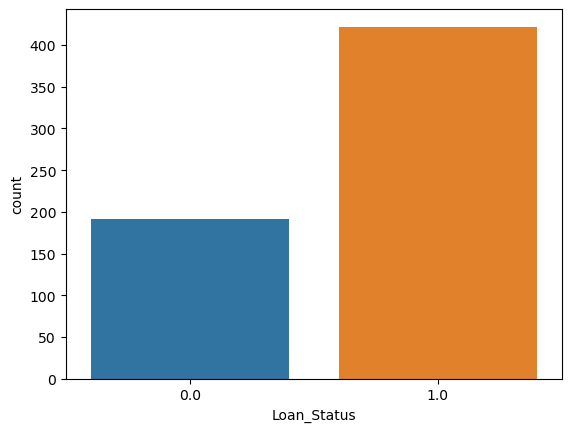

In [12]:
lc=sns.countplot(x='Loan_Status',data=loan_data)
print(loan_data['Loan_Status'].value_counts())

1.0    233
2.0    202
0.0    179
Name: Property_Area, dtype: int64


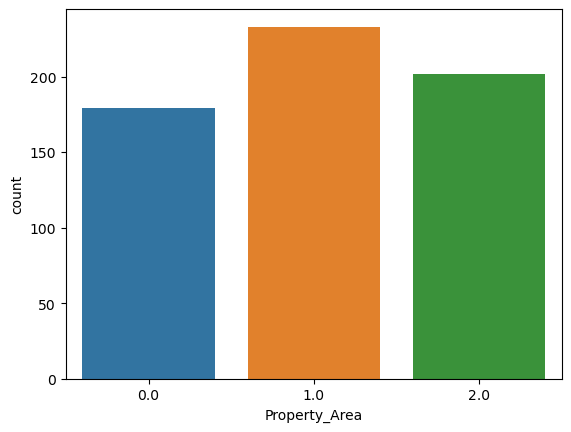

In [13]:
lc=sns.countplot(x='Property_Area',data=loan_data)
print(loan_data['Property_Area'].value_counts())

1.0    525
0.0     89
Name: Credit_History, dtype: int64


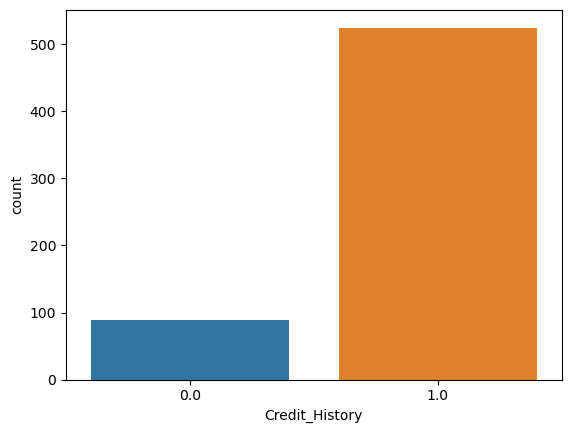

In [14]:
lc=sns.countplot(x='Credit_History',data=loan_data)
print(loan_data['Credit_History'].value_counts())

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


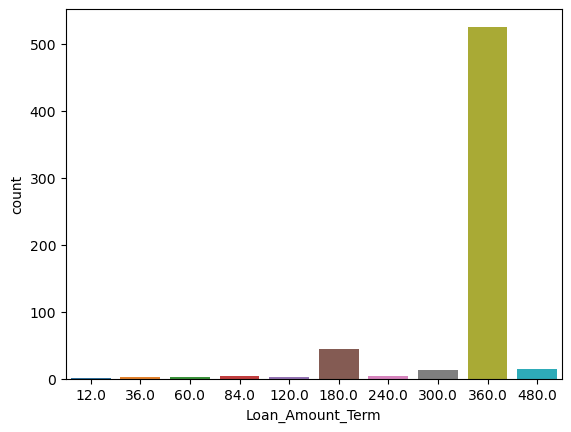

In [15]:
lc=sns.countplot(x='Loan_Amount_Term',data=loan_data)
print(loan_data['Loan_Amount_Term'].value_counts())

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


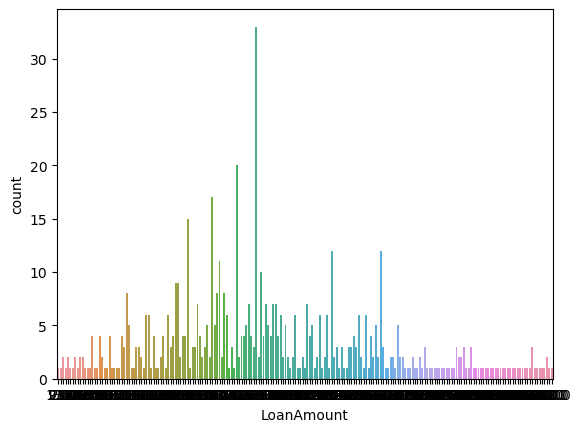

In [16]:
lc=sns.countplot(x='LoanAmount',data=loan_data)
print(loan_data['LoanAmount'].value_counts())

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


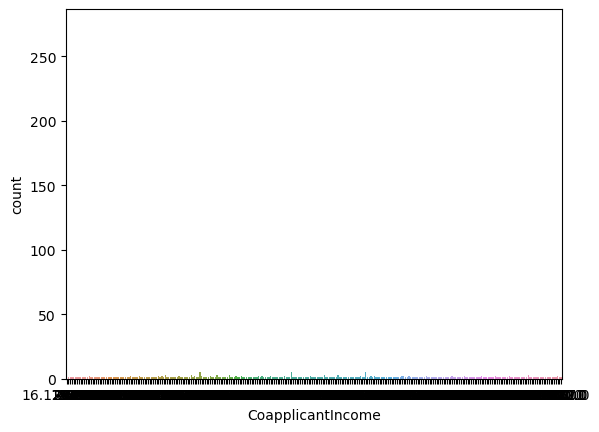

In [17]:
lc=sns.countplot(x='CoapplicantIncome',data=loan_data)
print(loan_data['CoapplicantIncome'].value_counts())

2500.0    9
4583.0    6
6000.0    6
2600.0    6
3333.0    5
         ..
3244.0    1
4408.0    1
3917.0    1
3992.0    1
7583.0    1
Name: ApplicantIncome, Length: 505, dtype: int64


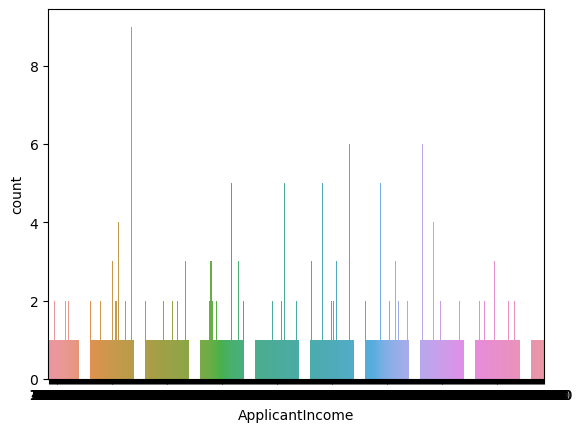

In [18]:
lc=sns.countplot(x='ApplicantIncome',data=loan_data)
print(loan_data['ApplicantIncome'].value_counts())

0.0    500
1.0     82
2.0     32
Name: Self_Employed, dtype: int64


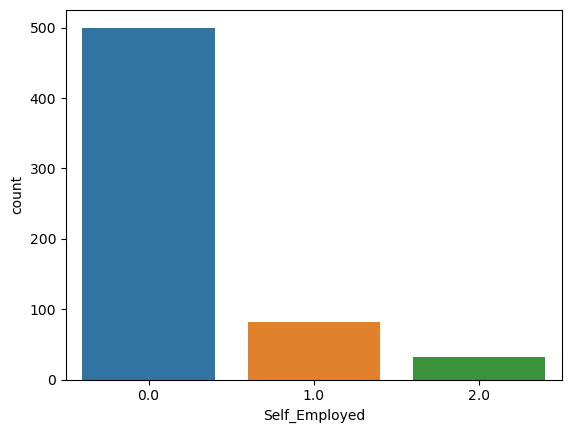

In [19]:
lc=sns.countplot(x='Self_Employed',data=loan_data)
print(loan_data['Self_Employed'].value_counts())

0.0    480
1.0    134
Name: Education, dtype: int64


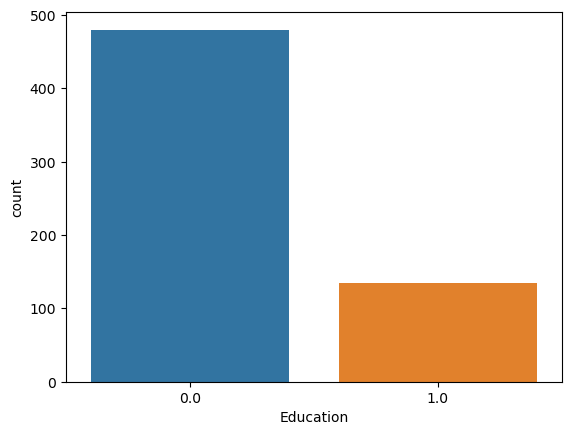

In [20]:
lc=sns.countplot(x='Education',data=loan_data)
print(loan_data['Education'].value_counts())

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64


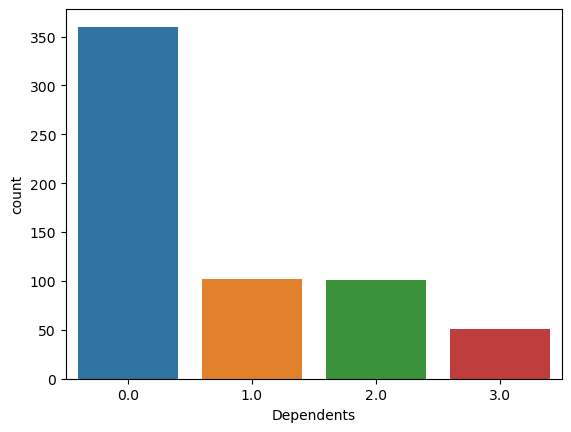

In [21]:
lc=sns.countplot(x='Dependents',data=loan_data)
print(loan_data['Dependents'].value_counts())

1.0    398
0.0    213
2.0      3
Name: Married, dtype: int64


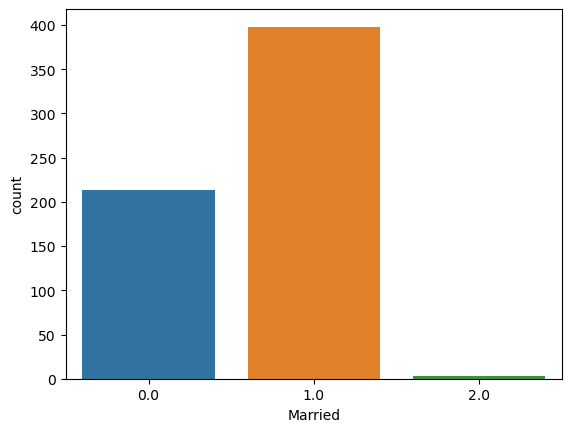

In [22]:
lc=sns.countplot(x='Married',data=loan_data)
print(loan_data['Married'].value_counts())

1.0    489
0.0    112
2.0     13
Name: Gender, dtype: int64


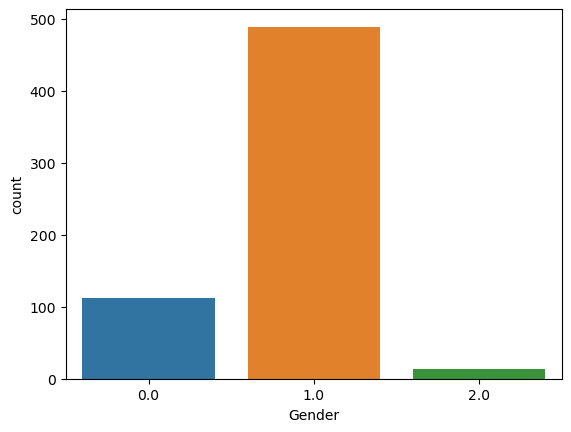

In [23]:
lc=sns.countplot(x='Gender',data=loan_data)
print(loan_data['Gender'].value_counts())

0.0      1
412.0    1
405.0    1
406.0    1
407.0    1
        ..
205.0    1
206.0    1
207.0    1
208.0    1
613.0    1
Name: Loan_ID, Length: 614, dtype: int64


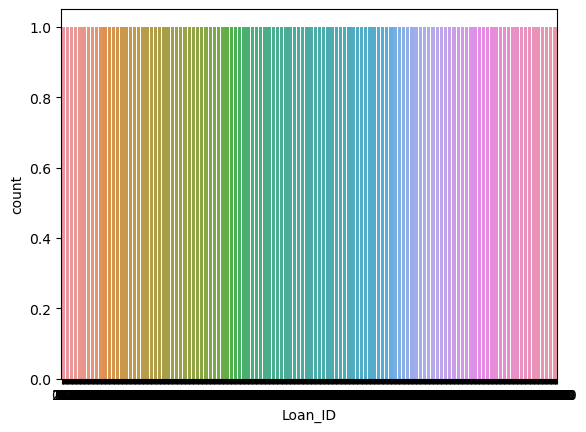

In [24]:
lc=sns.countplot(x='Loan_ID',data=loan_data)
print(loan_data['Loan_ID'].value_counts())

Distribution plots

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_10420\333826514.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data[col],color="b")
C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_10420\333826514.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data[col],color="b")
C:\Use

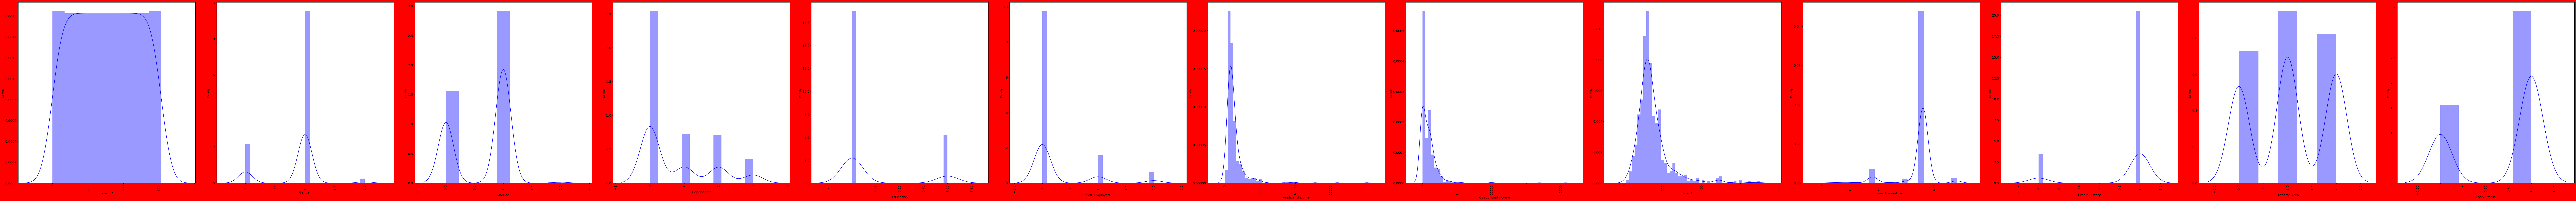

In [27]:
plt.figure(figsize=(145,145),facecolor = "red")
plotnumber=1
for col in loan_data_col:
    if plotnumber<=14:
        wc=plt.subplot(13,13,plotnumber)
        sns.distplot(loan_data[col],color="b")
        plt.xlabel(col,rotation=0,fontsize = 13)
        plt.xticks(rotation=90, fontsize=13)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.tight_layout()

Below are the findings from the above plots-

1) 'Gender' column is skewed to the left and little to the right
2) 'Married' column is skewed to the left and little to the right
3) 'Dependents' column is skewed to the right and to the left.
4) 'Education' column is skewed to the left and to the right.
5) 'Self_Employed' column is skewed to the left and a little ot the right
6) 'ApplicantIncome' column is skewed to the left.
7) 'CoapplicantIncome' column is skewed to the left.
8) 'LoanAmount' column is skewed to the left.
9) 'Loan_Amount_Term' is skewed to the right.
10) 'Credit_History' is skewed to the right.
11) 'Property_Area' has skeweness both to the left and right.
12) 'Loan_Status' is skewed tot he right.

'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'

Bivariate analysis

Strip plots

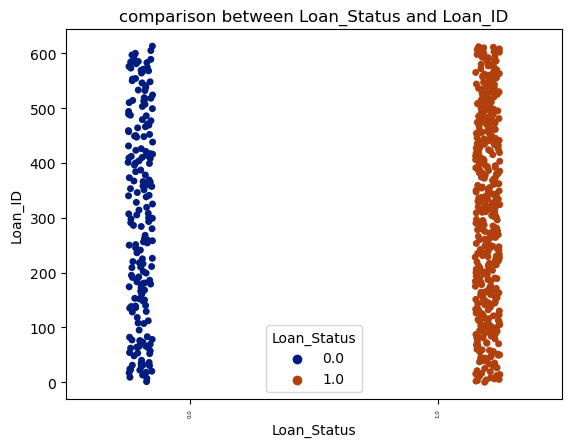

<Figure size 2800x200 with 0 Axes>

In [28]:
plt.title("comparison between Loan_Status and Loan_ID")
sns.stripplot(x= "Loan_Status", y= "Loan_ID", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

The applicant who was eligible for the loan_status are concentrated more in loan_id column than the ones hwo didnt.

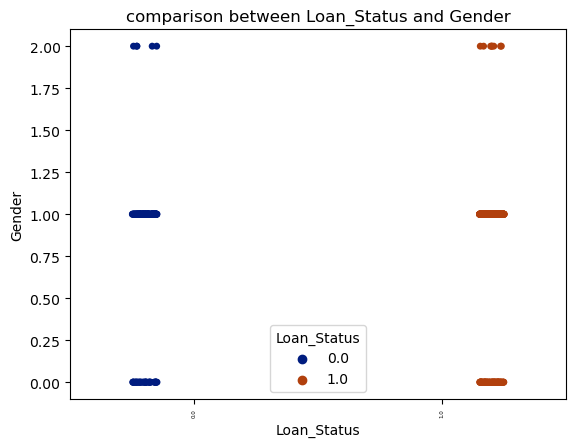

<Figure size 2800x200 with 0 Axes>

In [29]:
plt.title("comparison between Loan_Status and Gender")
sns.stripplot(x= "Loan_Status", y= "Gender", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

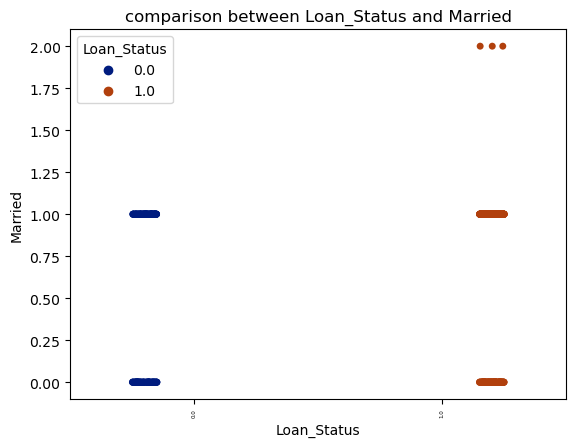

<Figure size 2800x200 with 0 Axes>

In [30]:
plt.title("comparison between Loan_Status and Married")
sns.stripplot(x= "Loan_Status", y= "Married", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

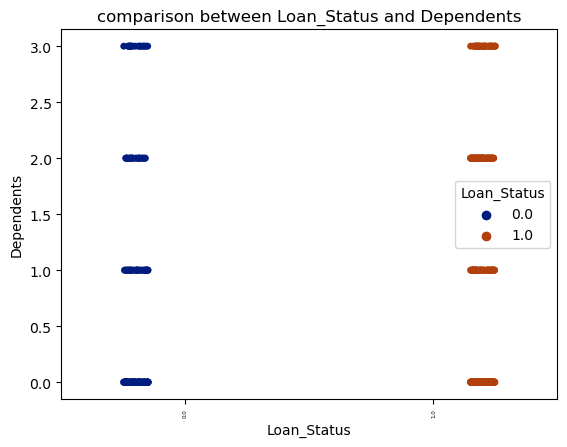

<Figure size 2800x200 with 0 Axes>

In [31]:
plt.title("comparison between Loan_Status and Dependents")
sns.stripplot(x= "Loan_Status", y= "Dependents", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

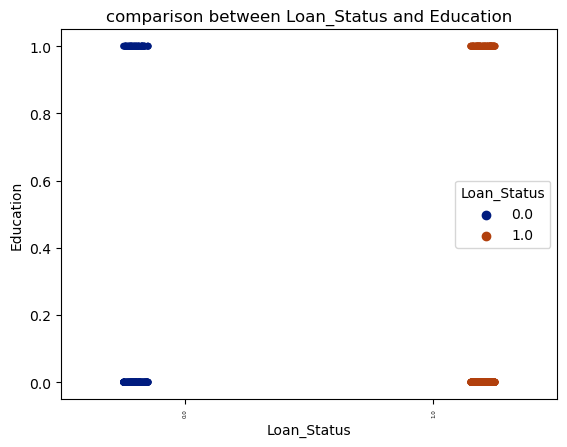

<Figure size 2800x200 with 0 Axes>

In [ ]:
plt.title("comparison between Loan_Status and Education")
sns.stripplot(x= "Loan_Status", y= "Education", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

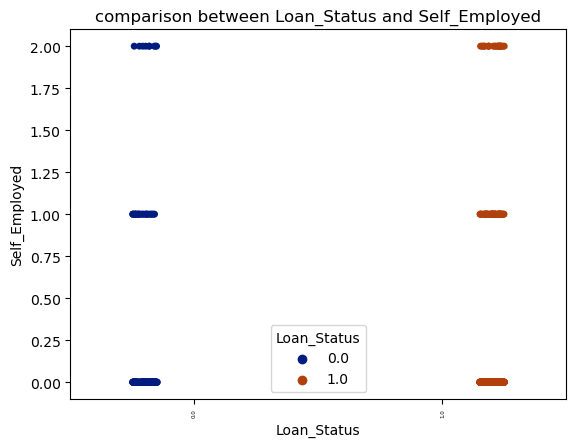

<Figure size 2800x200 with 0 Axes>

In [33]:
plt.title("comparison between Loan_Status and Self_Employed")
sns.stripplot(x= "Loan_Status", y= "Self_Employed", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

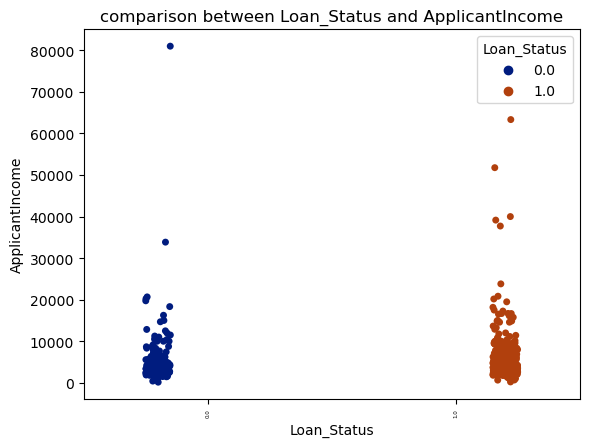

<Figure size 2800x200 with 0 Axes>

In [34]:
plt.title("comparison between Loan_Status and ApplicantIncome")
sns.stripplot(x= "Loan_Status", y= "ApplicantIncome", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

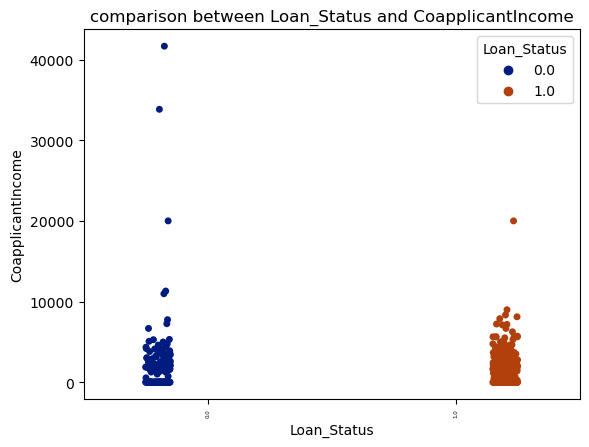

<Figure size 2800x200 with 0 Axes>

In [35]:
plt.title("comparison between Loan_Status and CoapplicantIncome")
sns.stripplot(x= "Loan_Status", y= "CoapplicantIncome", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

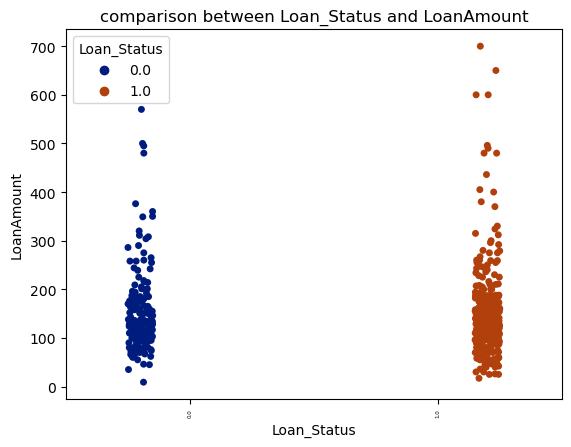

<Figure size 2800x200 with 0 Axes>

In [36]:
plt.title("comparison between Loan_Status and LoanAmount")
sns.stripplot(x= "Loan_Status", y= "LoanAmount", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

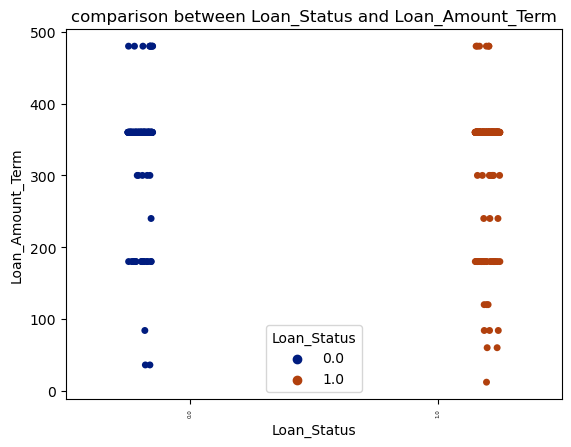

<Figure size 2800x200 with 0 Axes>

In [37]:
plt.title("comparison between Loan_Status and Loan_Amount_Term")
sns.stripplot(x= "Loan_Status", y= "Loan_Amount_Term", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

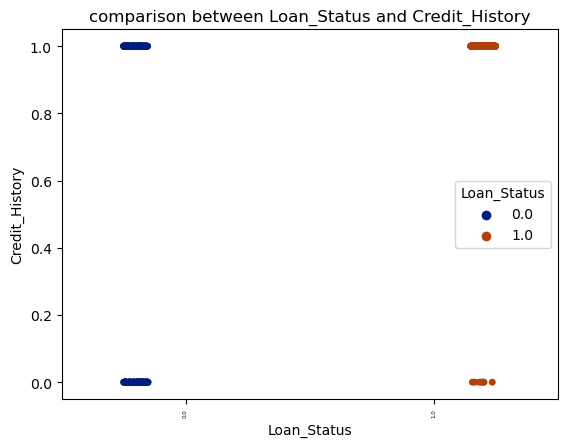

<Figure size 2800x200 with 0 Axes>

In [38]:
plt.title("comparison between Loan_Status and Credit_History")
sns.stripplot(x= "Loan_Status", y= "Credit_History", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

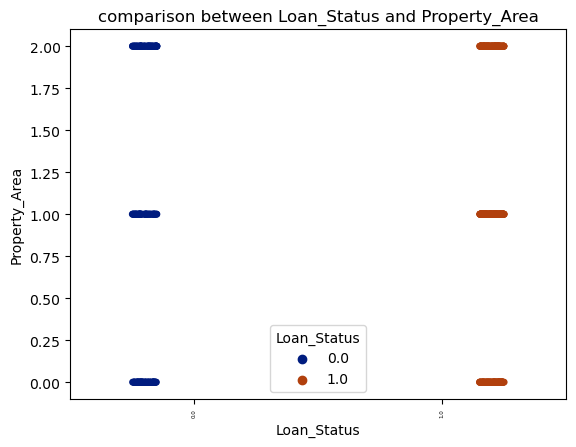

<Figure size 2800x200 with 0 Axes>

In [39]:
plt.title("comparison between Loan_Status and Property_Area")
sns.stripplot(x= "Loan_Status", y= "Property_Area", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

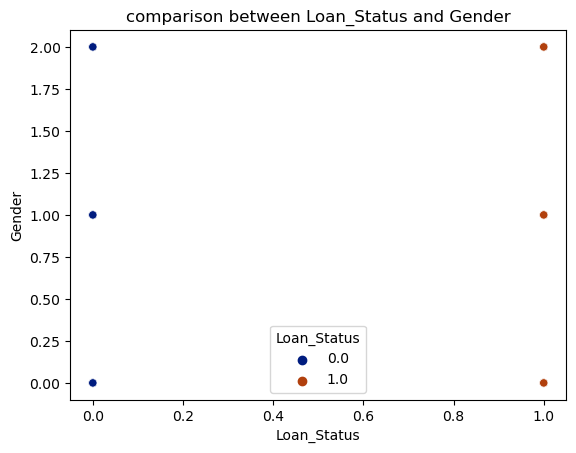

In [40]:
plt.title("comparison between Loan_Status and Gender")
sns.scatterplot(x= 'Loan_Status', y= 'Gender', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

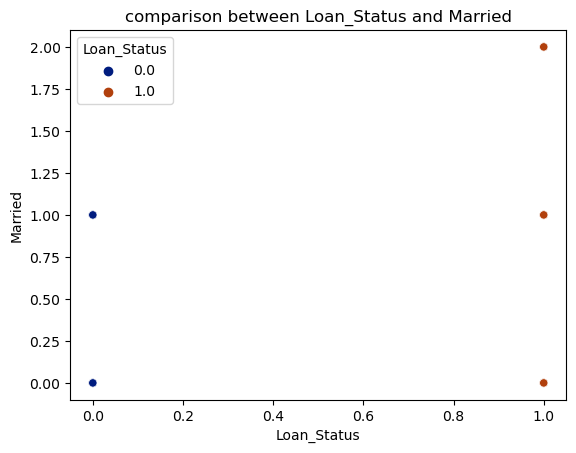

In [41]:
plt.title("comparison between Loan_Status and Married")
sns.scatterplot(x= 'Loan_Status', y= 'Married', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

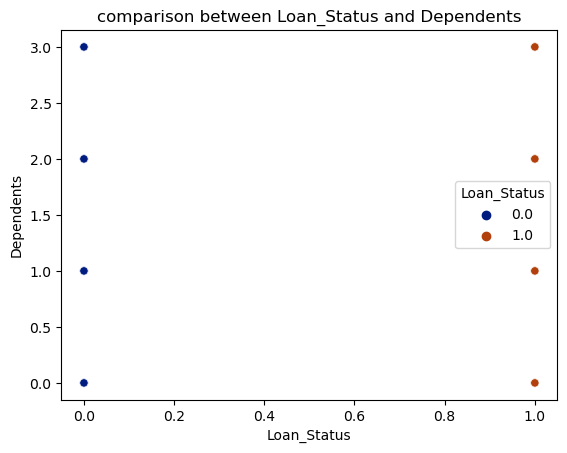

In [42]:
plt.title("comparison between Loan_Status and Dependents")
sns.scatterplot(x= 'Loan_Status', y= 'Dependents', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

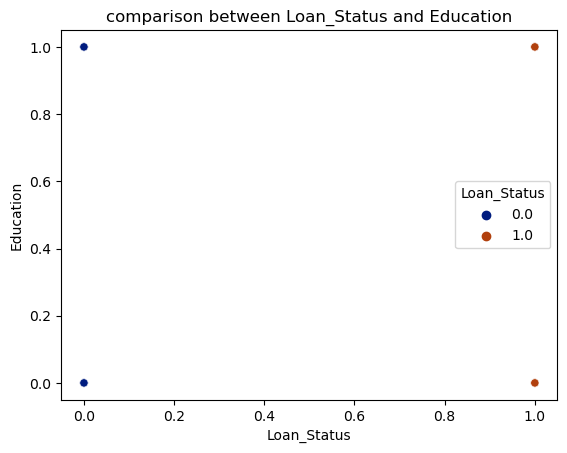

In [43]:
plt.title("comparison between Loan_Status and Education")
sns.scatterplot(x= 'Loan_Status', y= 'Education', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

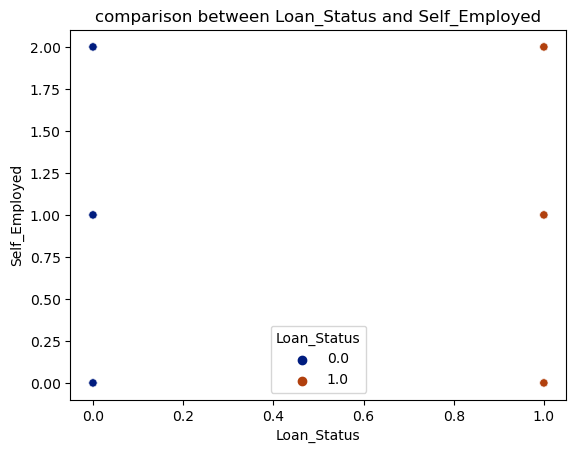

In [44]:
plt.title("comparison between Loan_Status and Self_Employed")
sns.scatterplot(x= 'Loan_Status', y= 'Self_Employed', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

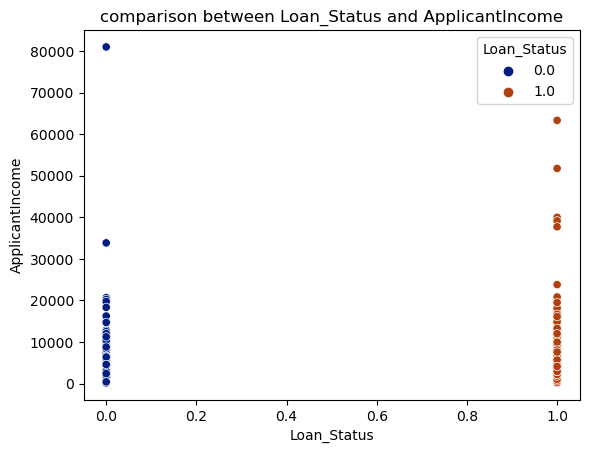

In [45]:
plt.title("comparison between Loan_Status and ApplicantIncome")
sns.scatterplot(x= 'Loan_Status', y= 'ApplicantIncome', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

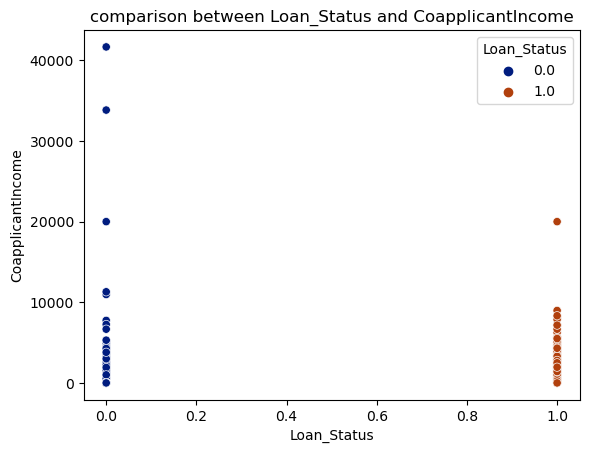

In [46]:
plt.title("comparison between Loan_Status and CoapplicantIncome")
sns.scatterplot(x= 'Loan_Status', y= 'CoapplicantIncome', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

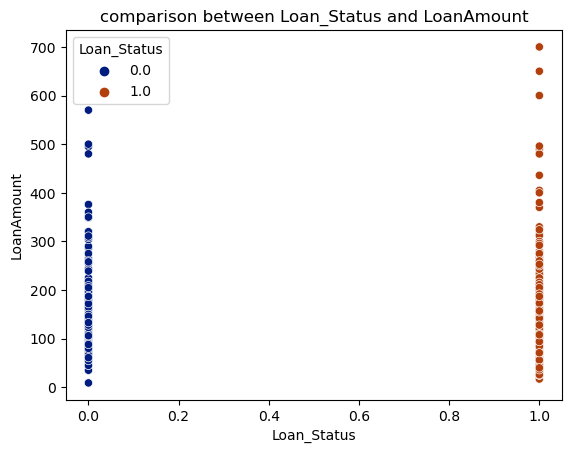

In [47]:
plt.title("comparison between Loan_Status and LoanAmount")
sns.scatterplot(x= 'Loan_Status', y= 'LoanAmount', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

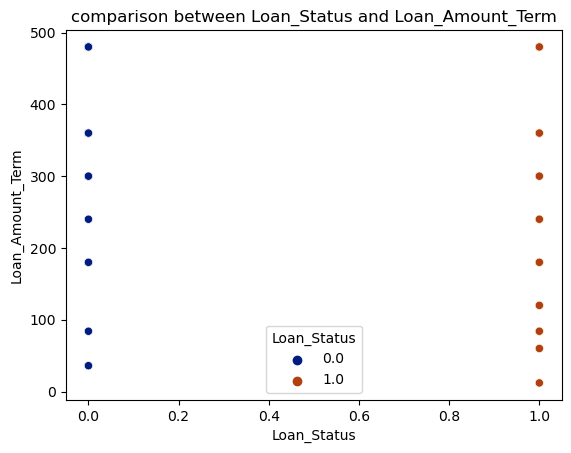

In [48]:
plt.title("comparison between Loan_Status and Loan_Amount_Term")
sns.scatterplot(x= 'Loan_Status', y= 'Loan_Amount_Term', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

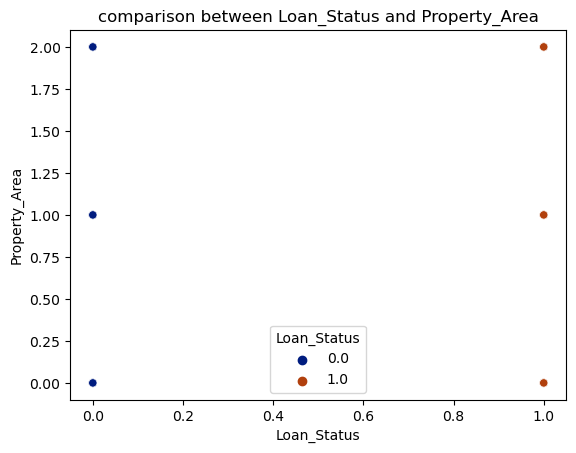

In [49]:
plt.title("comparison between Loan_Status and Property_Area")
sns.scatterplot(x= 'Loan_Status', y= 'Property_Area', data = loan_data,hue='Loan_Status', palette='dark')
plt.show()

no conclusive statements can be made from the above plot.

Barplots

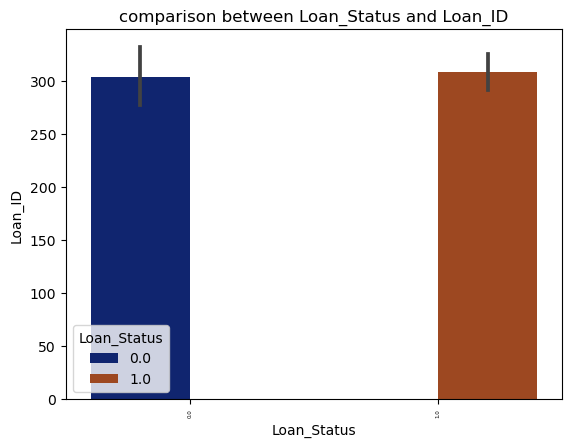

<Figure size 2800x200 with 0 Axes>

In [50]:
plt.title("comparison between Loan_Status and Loan_ID")
sns.barplot(x= "Loan_Status", y= "Loan_ID", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

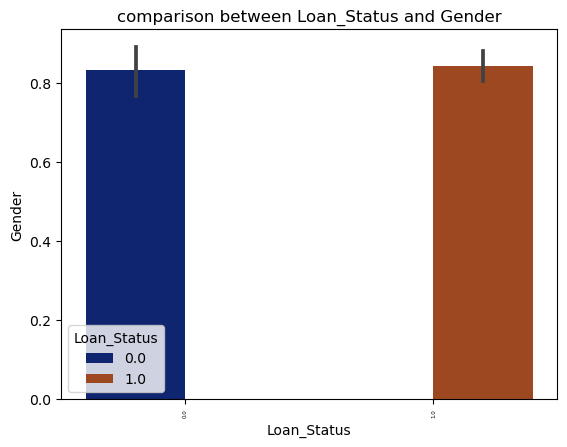

<Figure size 2800x200 with 0 Axes>

In [51]:
plt.title("comparison between Loan_Status and Gender")
sns.barplot(x= "Loan_Status", y= "Gender", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

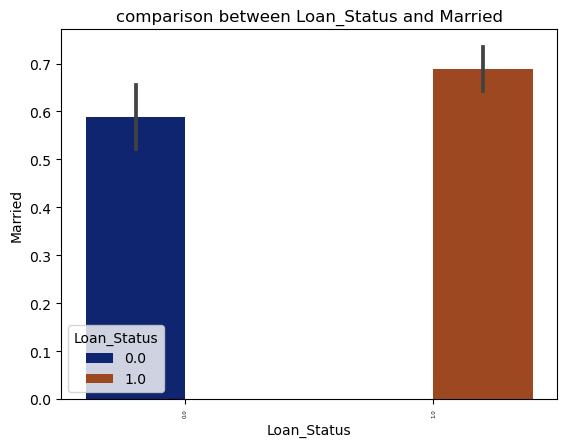

<Figure size 2800x200 with 0 Axes>

In [52]:
plt.title("comparison between Loan_Status and Married")
sns.barplot(x= "Loan_Status", y= "Married", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
there more people whose loans were approved in married column than the ones whose loans were not approved.

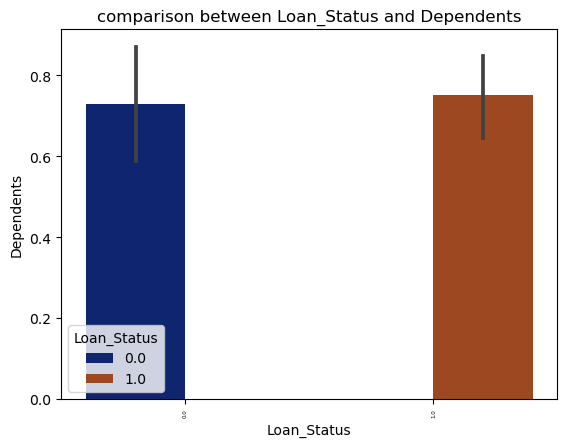

<Figure size 2800x200 with 0 Axes>

In [53]:
plt.title("comparison between Loan_Status and Dependents")
sns.barplot(x= "Loan_Status", y= "Dependents", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

In [ ]:
no conclusive statement can be made from the above plot.

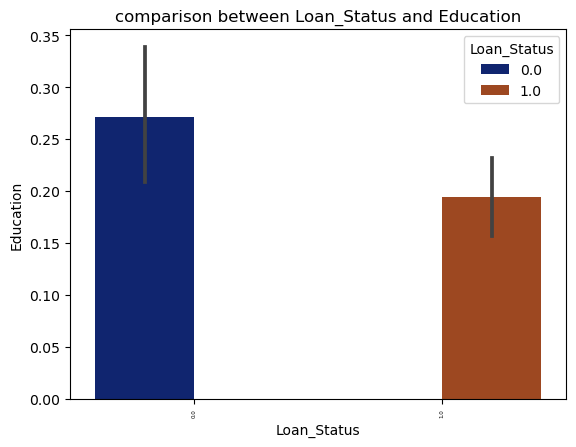

<Figure size 2800x200 with 0 Axes>

In [54]:
plt.title("comparison between Loan_Status and Education")
sns.barplot(x= "Loan_Status", y= "Education", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

peoples whose loans were not approved are higher when it comes to the education column than the ones who got it approved.

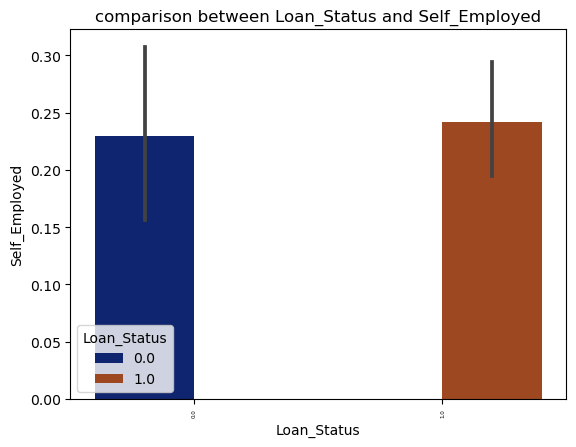

<Figure size 2800x200 with 0 Axes>

In [55]:
plt.title("comparison between Loan_Status and Self_Employed")
sns.barplot(x= "Loan_Status", y= "Self_Employed", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

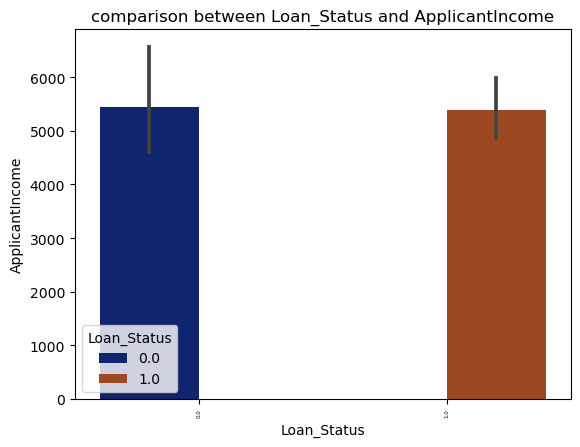

<Figure size 2800x200 with 0 Axes>

In [56]:
plt.title("comparison between Loan_Status and ApplicantIncome")
sns.barplot(x= "Loan_Status", y= "ApplicantIncome", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

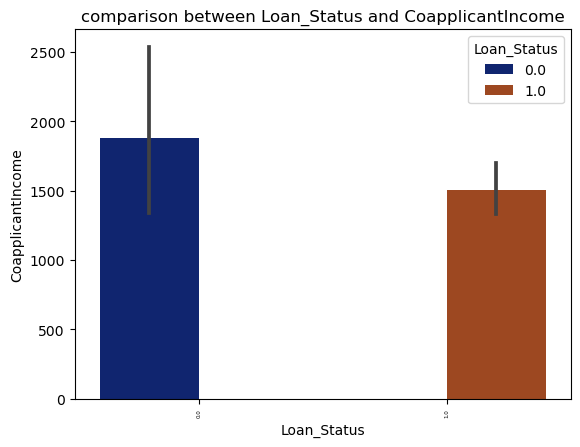

<Figure size 2800x200 with 0 Axes>

In [57]:
plt.title("comparison between Loan_Status and CoapplicantIncome")
sns.barplot(x= "Loan_Status", y= "CoapplicantIncome", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

people whose loans did not get approved had higher co applicant income than the ones who got it approved.

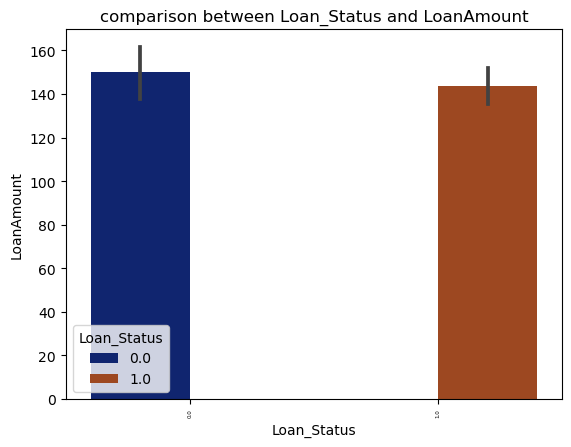

<Figure size 2800x200 with 0 Axes>

In [58]:
plt.title("comparison between Loan_Status and LoanAmount")
sns.barplot(x= "Loan_Status", y= "LoanAmount", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

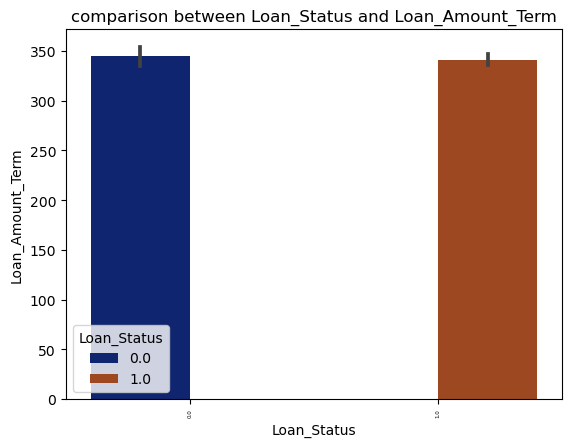

<Figure size 2800x200 with 0 Axes>

In [59]:
plt.title("comparison between Loan_Status and Loan_Amount_Term")
sns.barplot(x= "Loan_Status", y= "Loan_Amount_Term", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

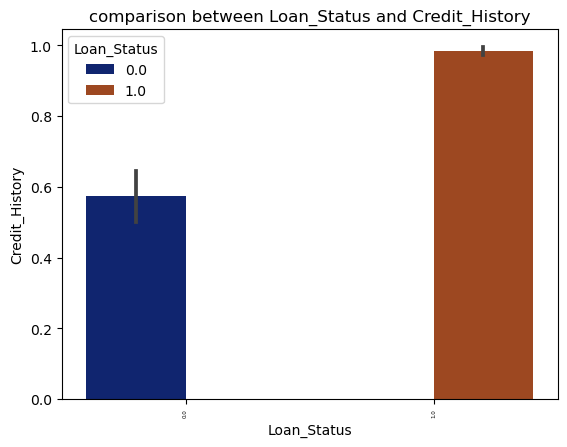

<Figure size 2800x200 with 0 Axes>

In [60]:
plt.title("comparison between Loan_Status and Credit_History")
sns.barplot(x= "Loan_Status", y= "Credit_History", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

people whose loans were approved has higher creadit history scores than the ones who didnt.

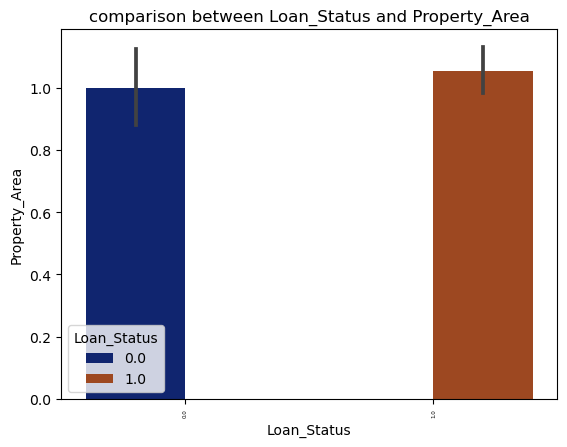

<Figure size 2800x200 with 0 Axes>

In [61]:
plt.title("comparison between Loan_Status and Property_Area")
sns.barplot(x= "Loan_Status", y= "Property_Area", data = loan_data,hue='Loan_Status', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'

Catplots

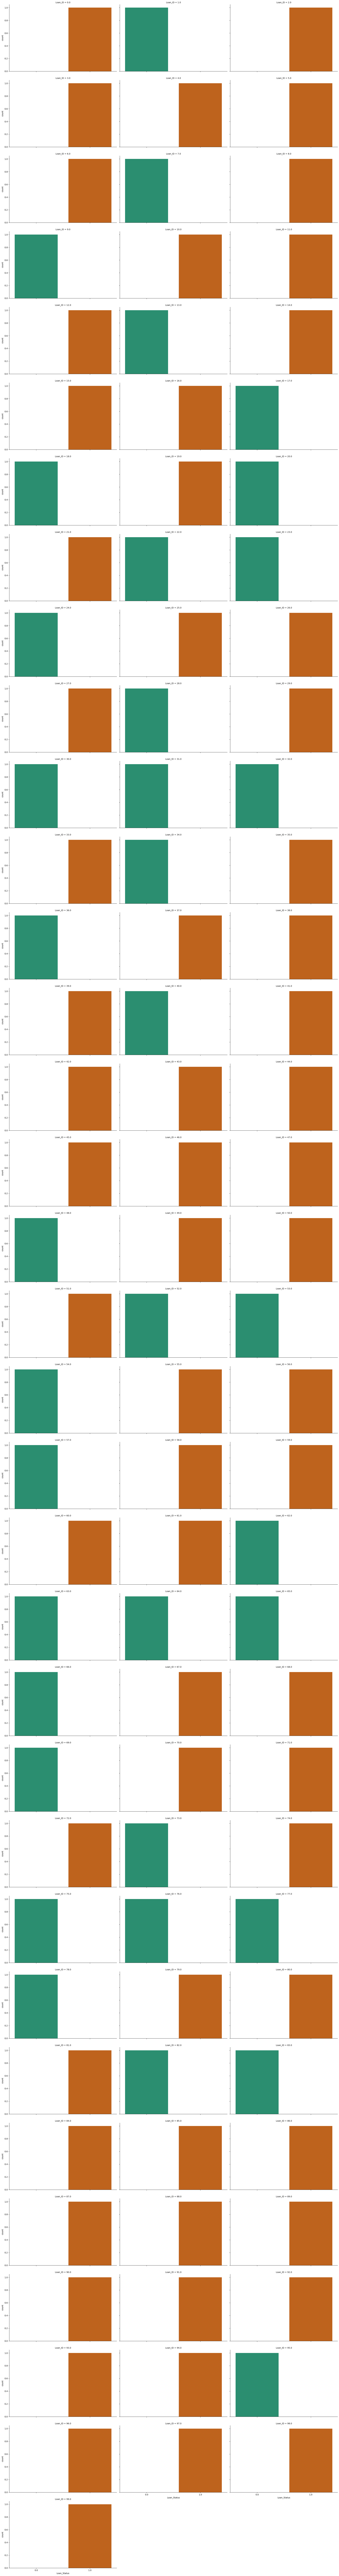

In [63]:
sns.catplot(x= 'Loan_Status', col= 'Loan_ID', data = loan_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

no conclusive statement can be made from the above plot.

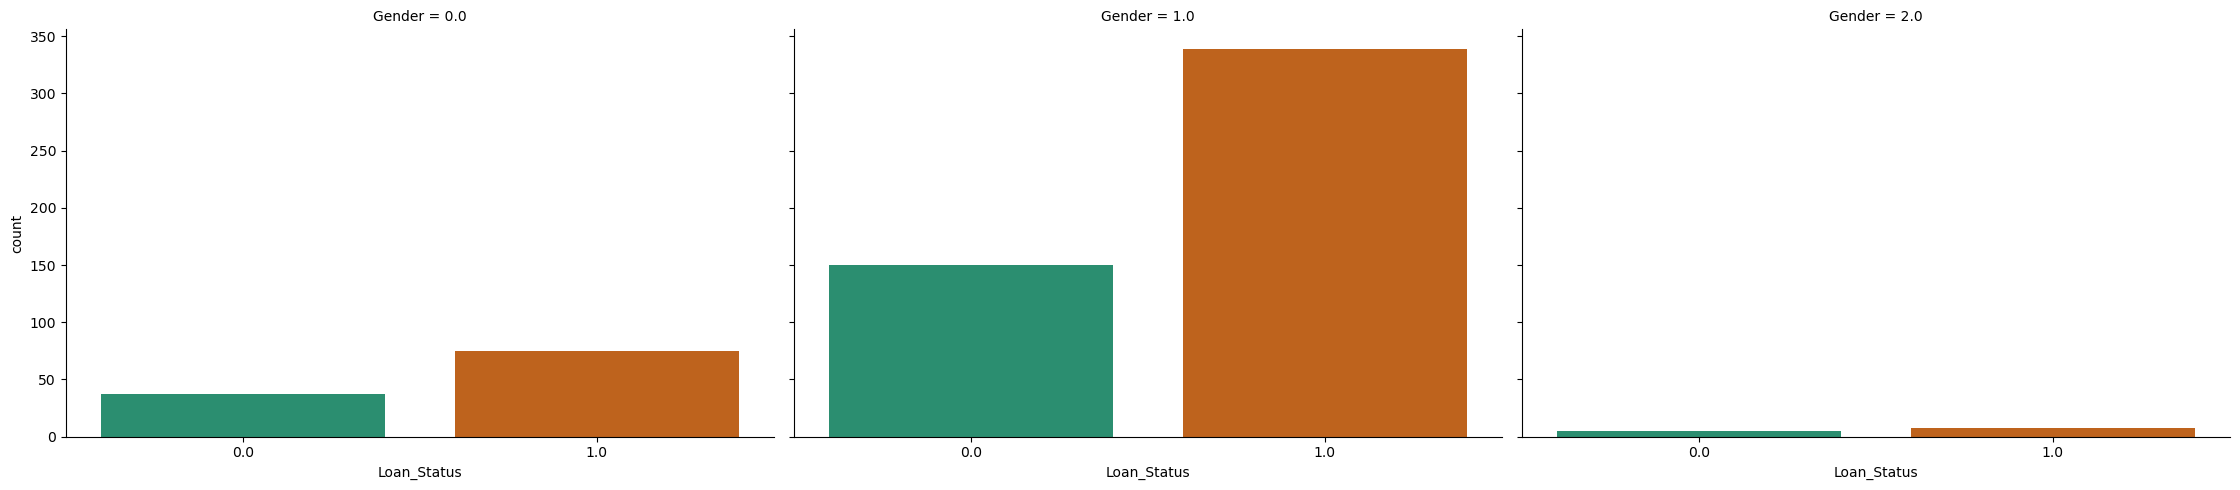

In [64]:
sns.catplot(x= 'Loan_Status', col= 'Gender', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

Most of the prople whose loans were eligible for approvable are for males.

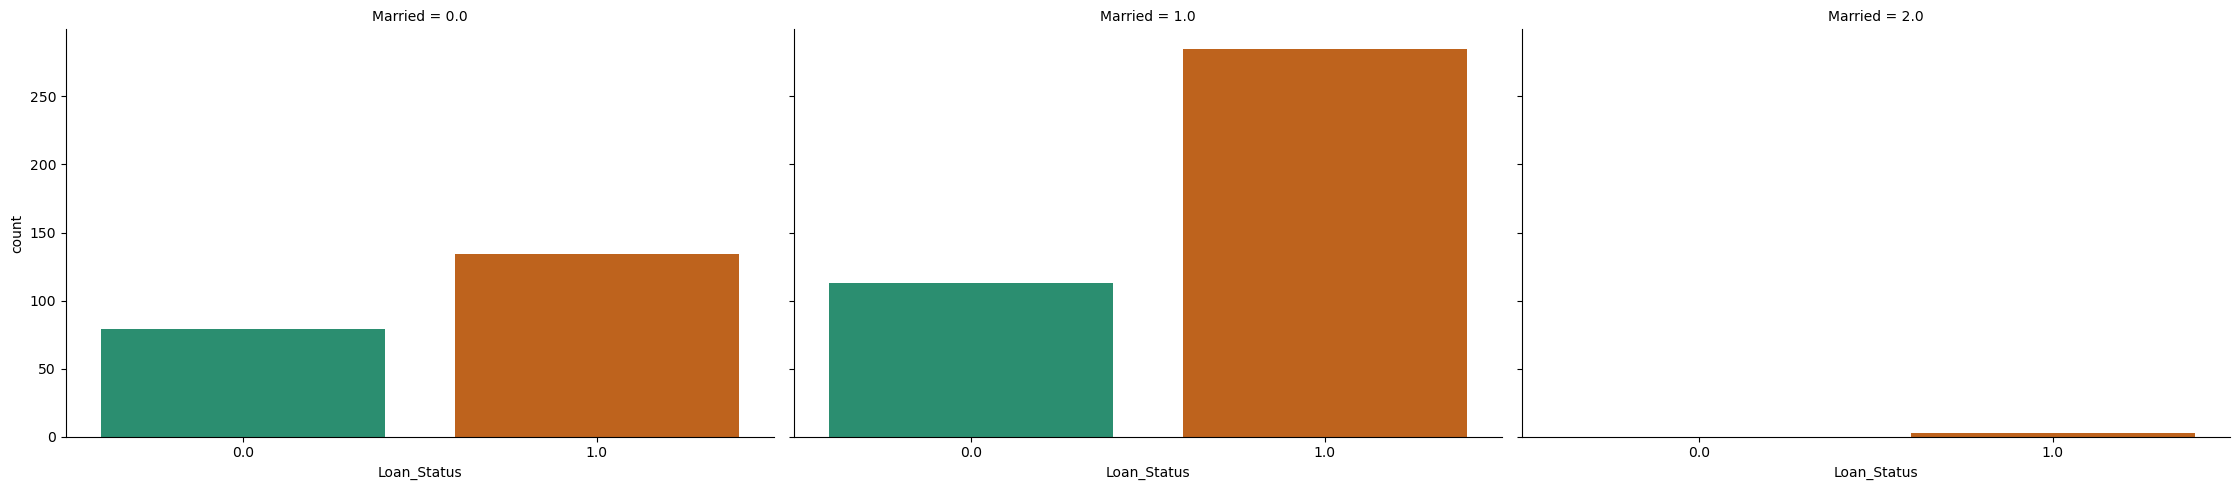

In [65]:
sns.catplot(x= 'Loan_Status', col= 'Married', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the people whose loans were approved were married.

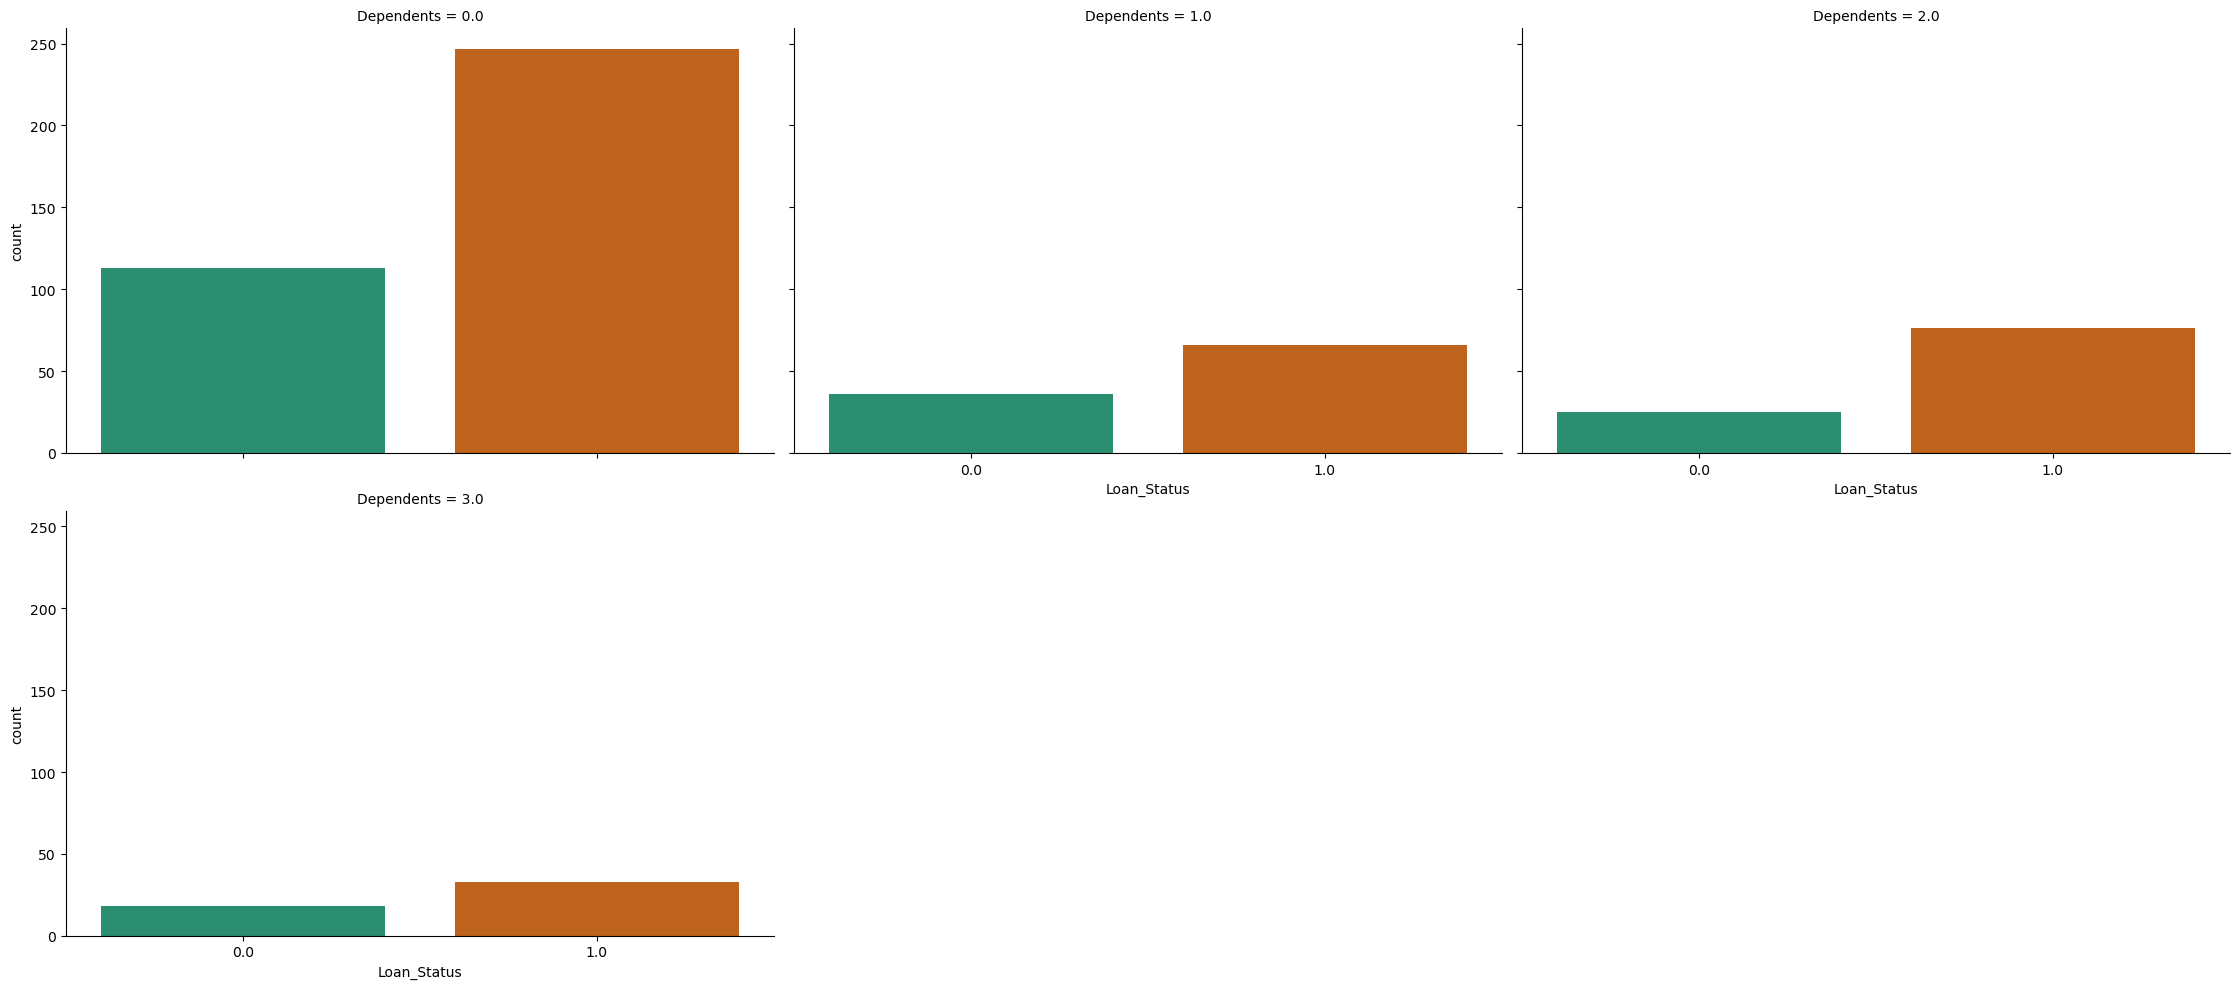

In [66]:
sns.catplot(x= 'Loan_Status', col= 'Dependents', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the people whose loans were not approved did not have any dependents.

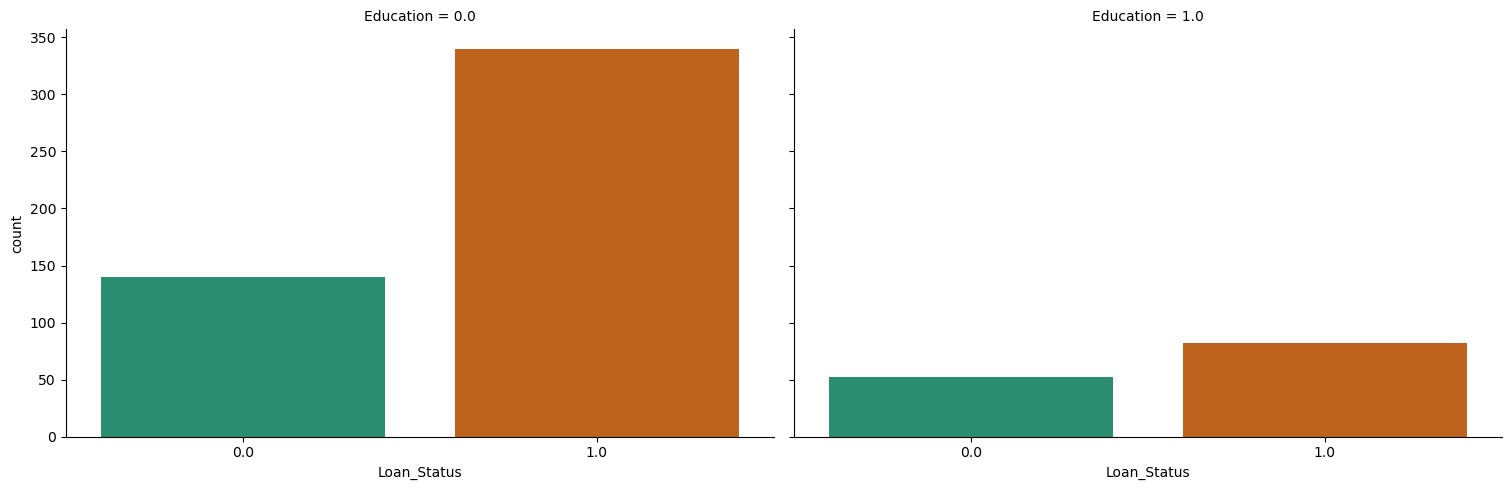

In [67]:
sns.catplot(x= 'Loan_Status', col= 'Education', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of people whose loans were approved were not graduates.

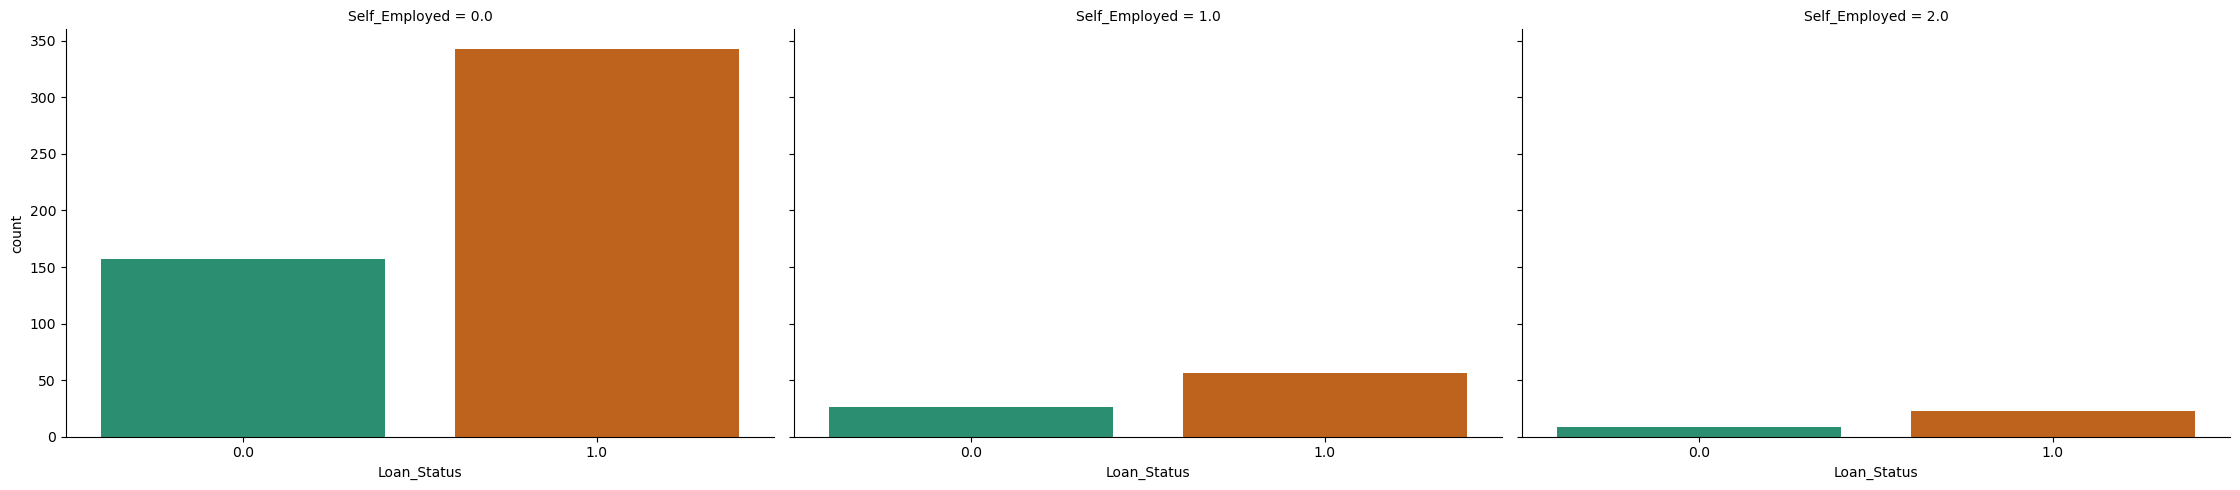

In [68]:
sns.catplot(x= 'Loan_Status', col= 'Self_Employed', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of people whose loans were approved are not self-employed.

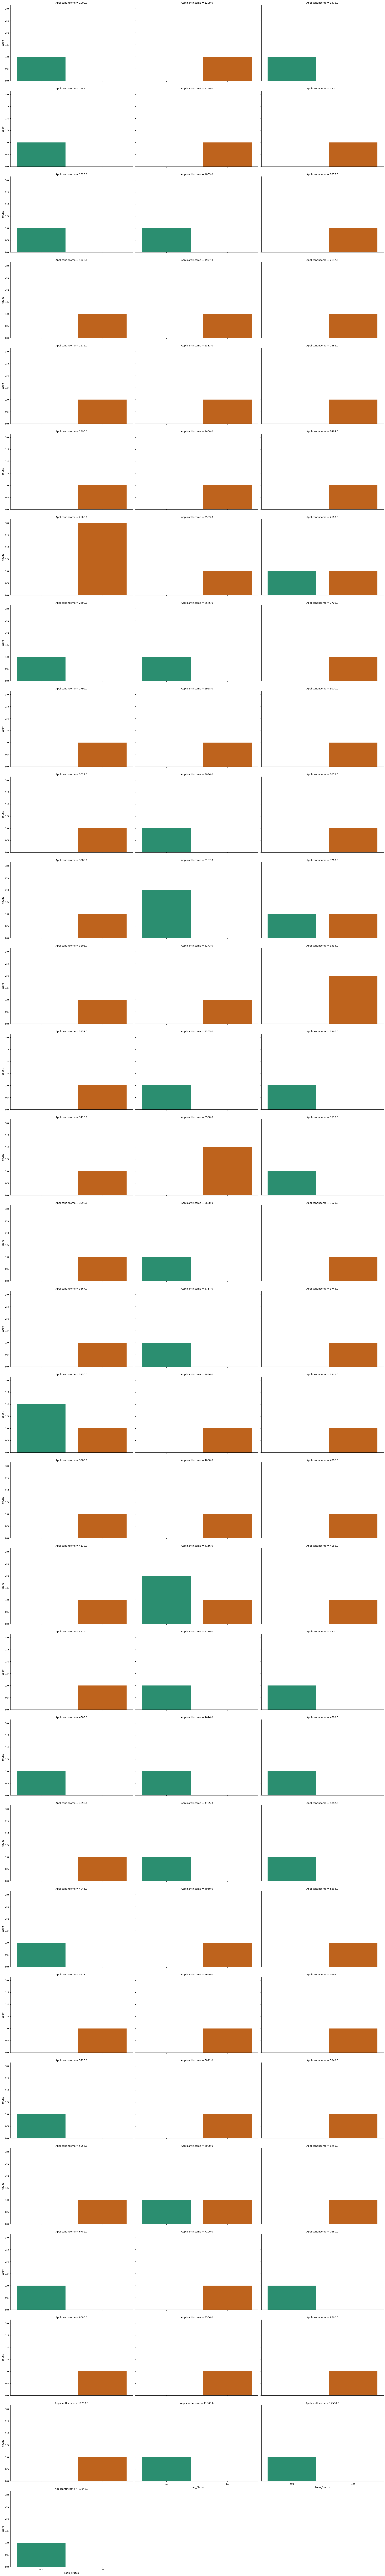

In [70]:
sns.catplot(x= 'Loan_Status', col= 'ApplicantIncome', data = loan_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

applicant income was 2500 for the ones who got their loans approved. applicant income was 4166, 3750 for ones whose loans were not approved.

In [71]:
sns.catplot(x= 'Loan_Status', col= 'CoapplicantIncome', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

people whose loans were approved majoritly didnt have any co applicant income displayed.

In [72]:
sns.catplot(x= 'Loan_Status', col= 'LoanAmount', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

In [ ]:
loan amount was 128 for the people whose loans were approved.

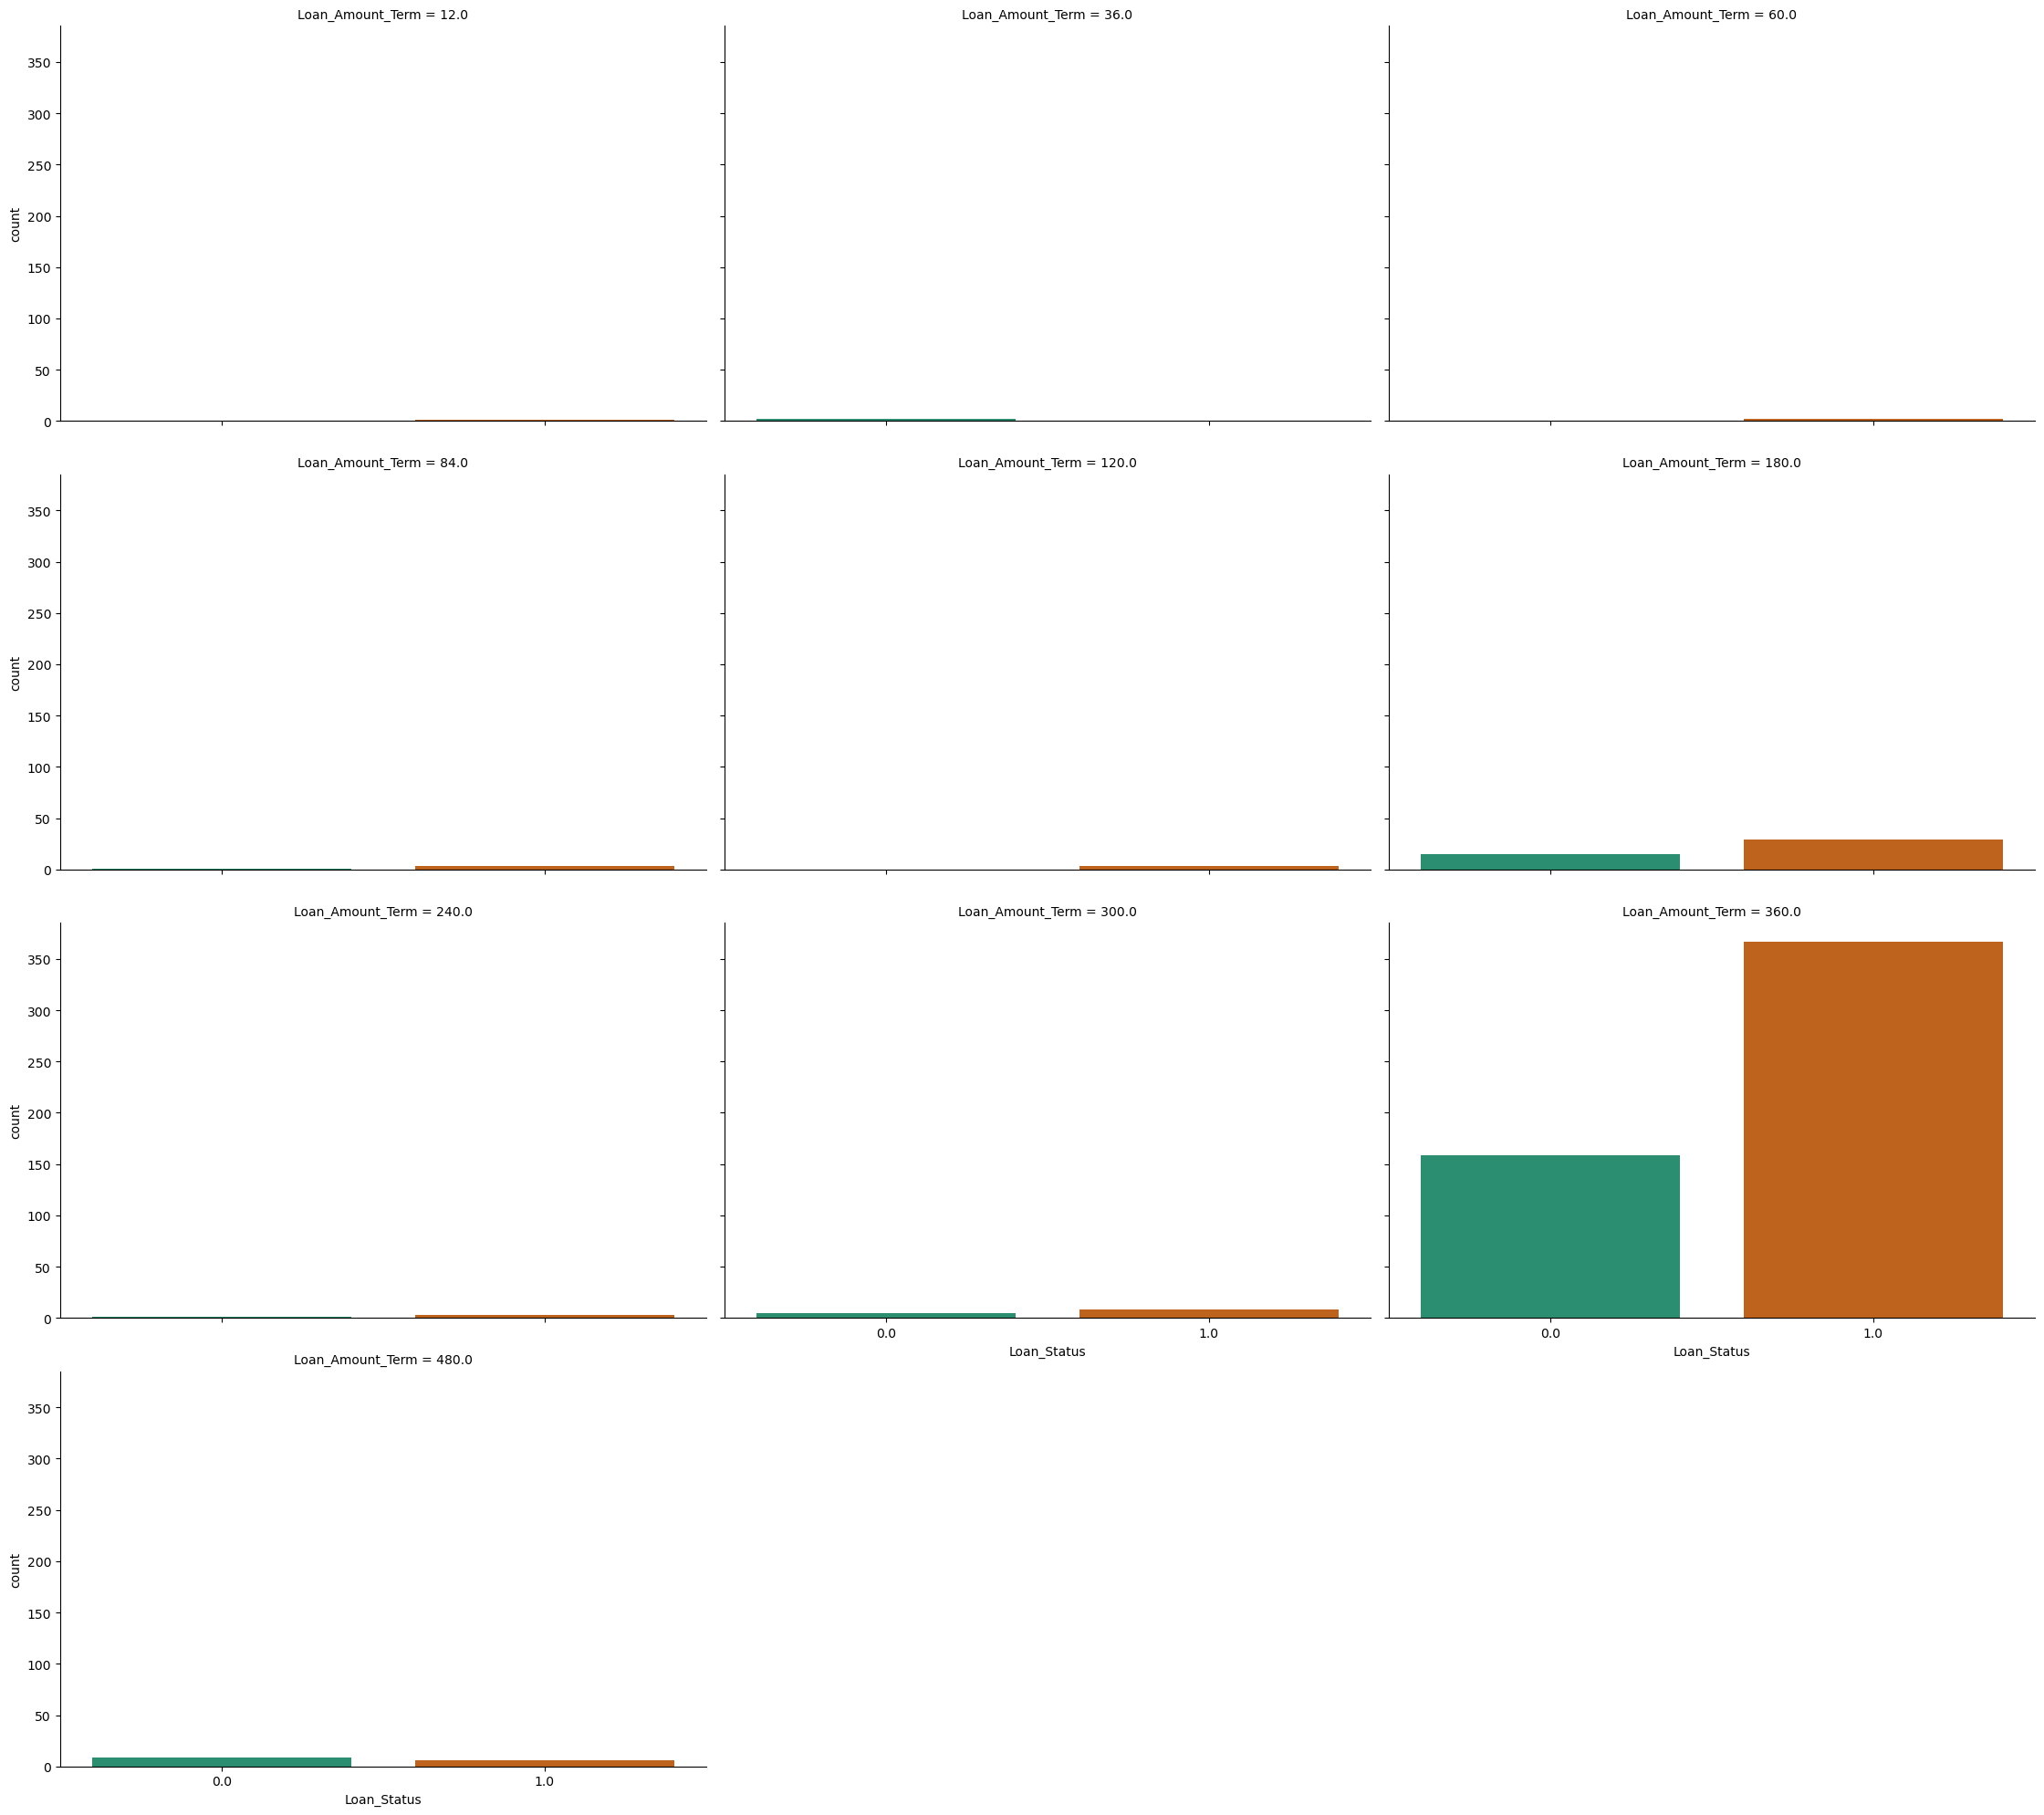

In [73]:
sns.catplot(x= 'Loan_Status', col= 'Loan_Amount_Term', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the people whose loans were aprroved had a loan amount term 360.

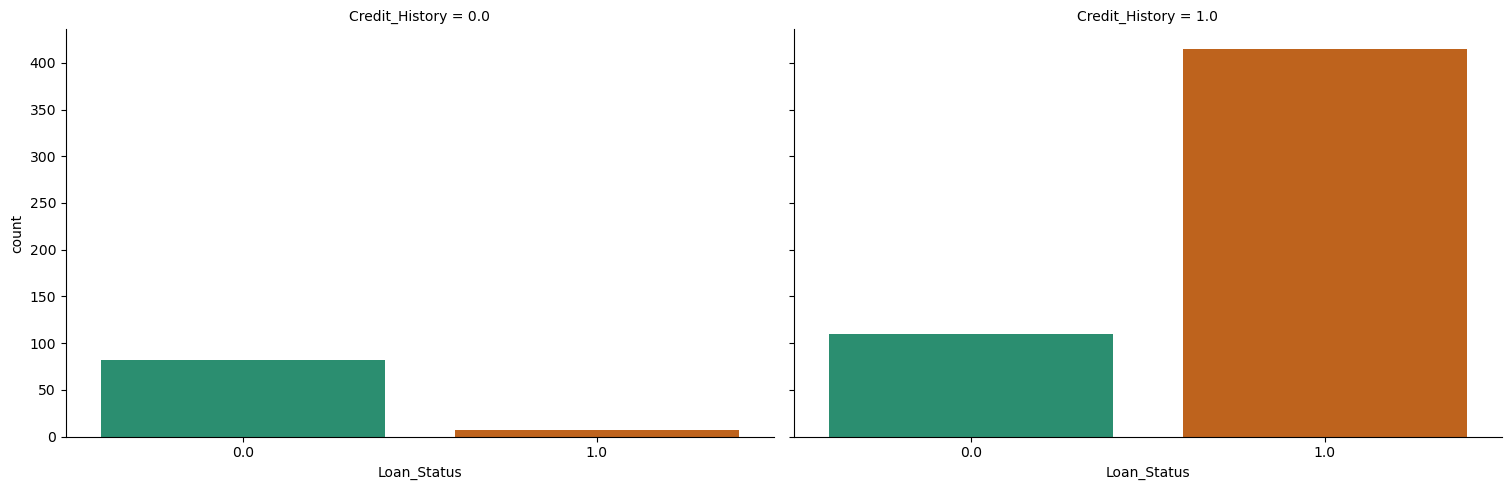

In [74]:
sns.catplot(x= 'Loan_Status', col= 'Credit_History', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

people whose loans were approved had a creadit history than the ones who didnt get approved.

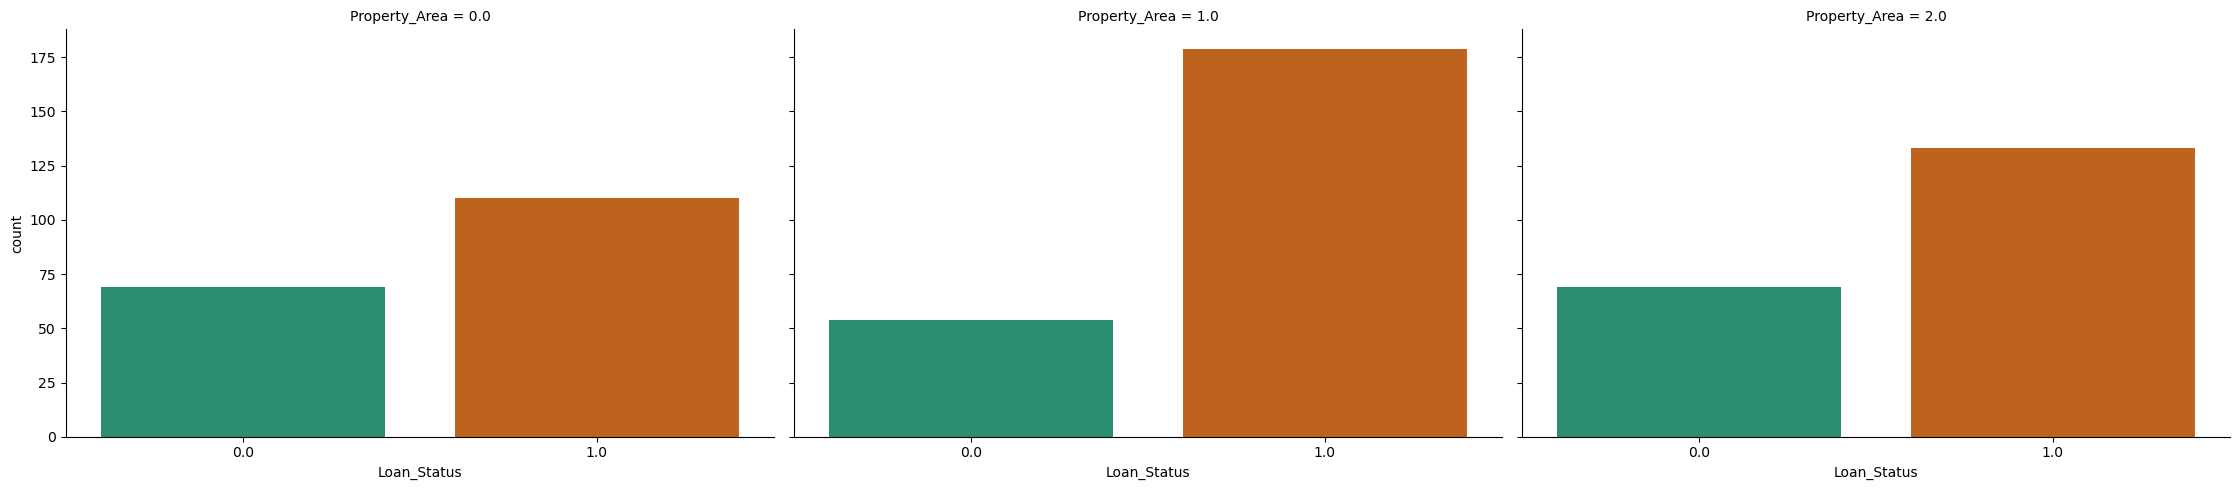

In [75]:
sns.catplot(x= 'Loan_Status', col= 'Property_Area', data = loan_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

majority of the people whose loans were approved came from property area 1.

Multivariate analysis

Pairplots

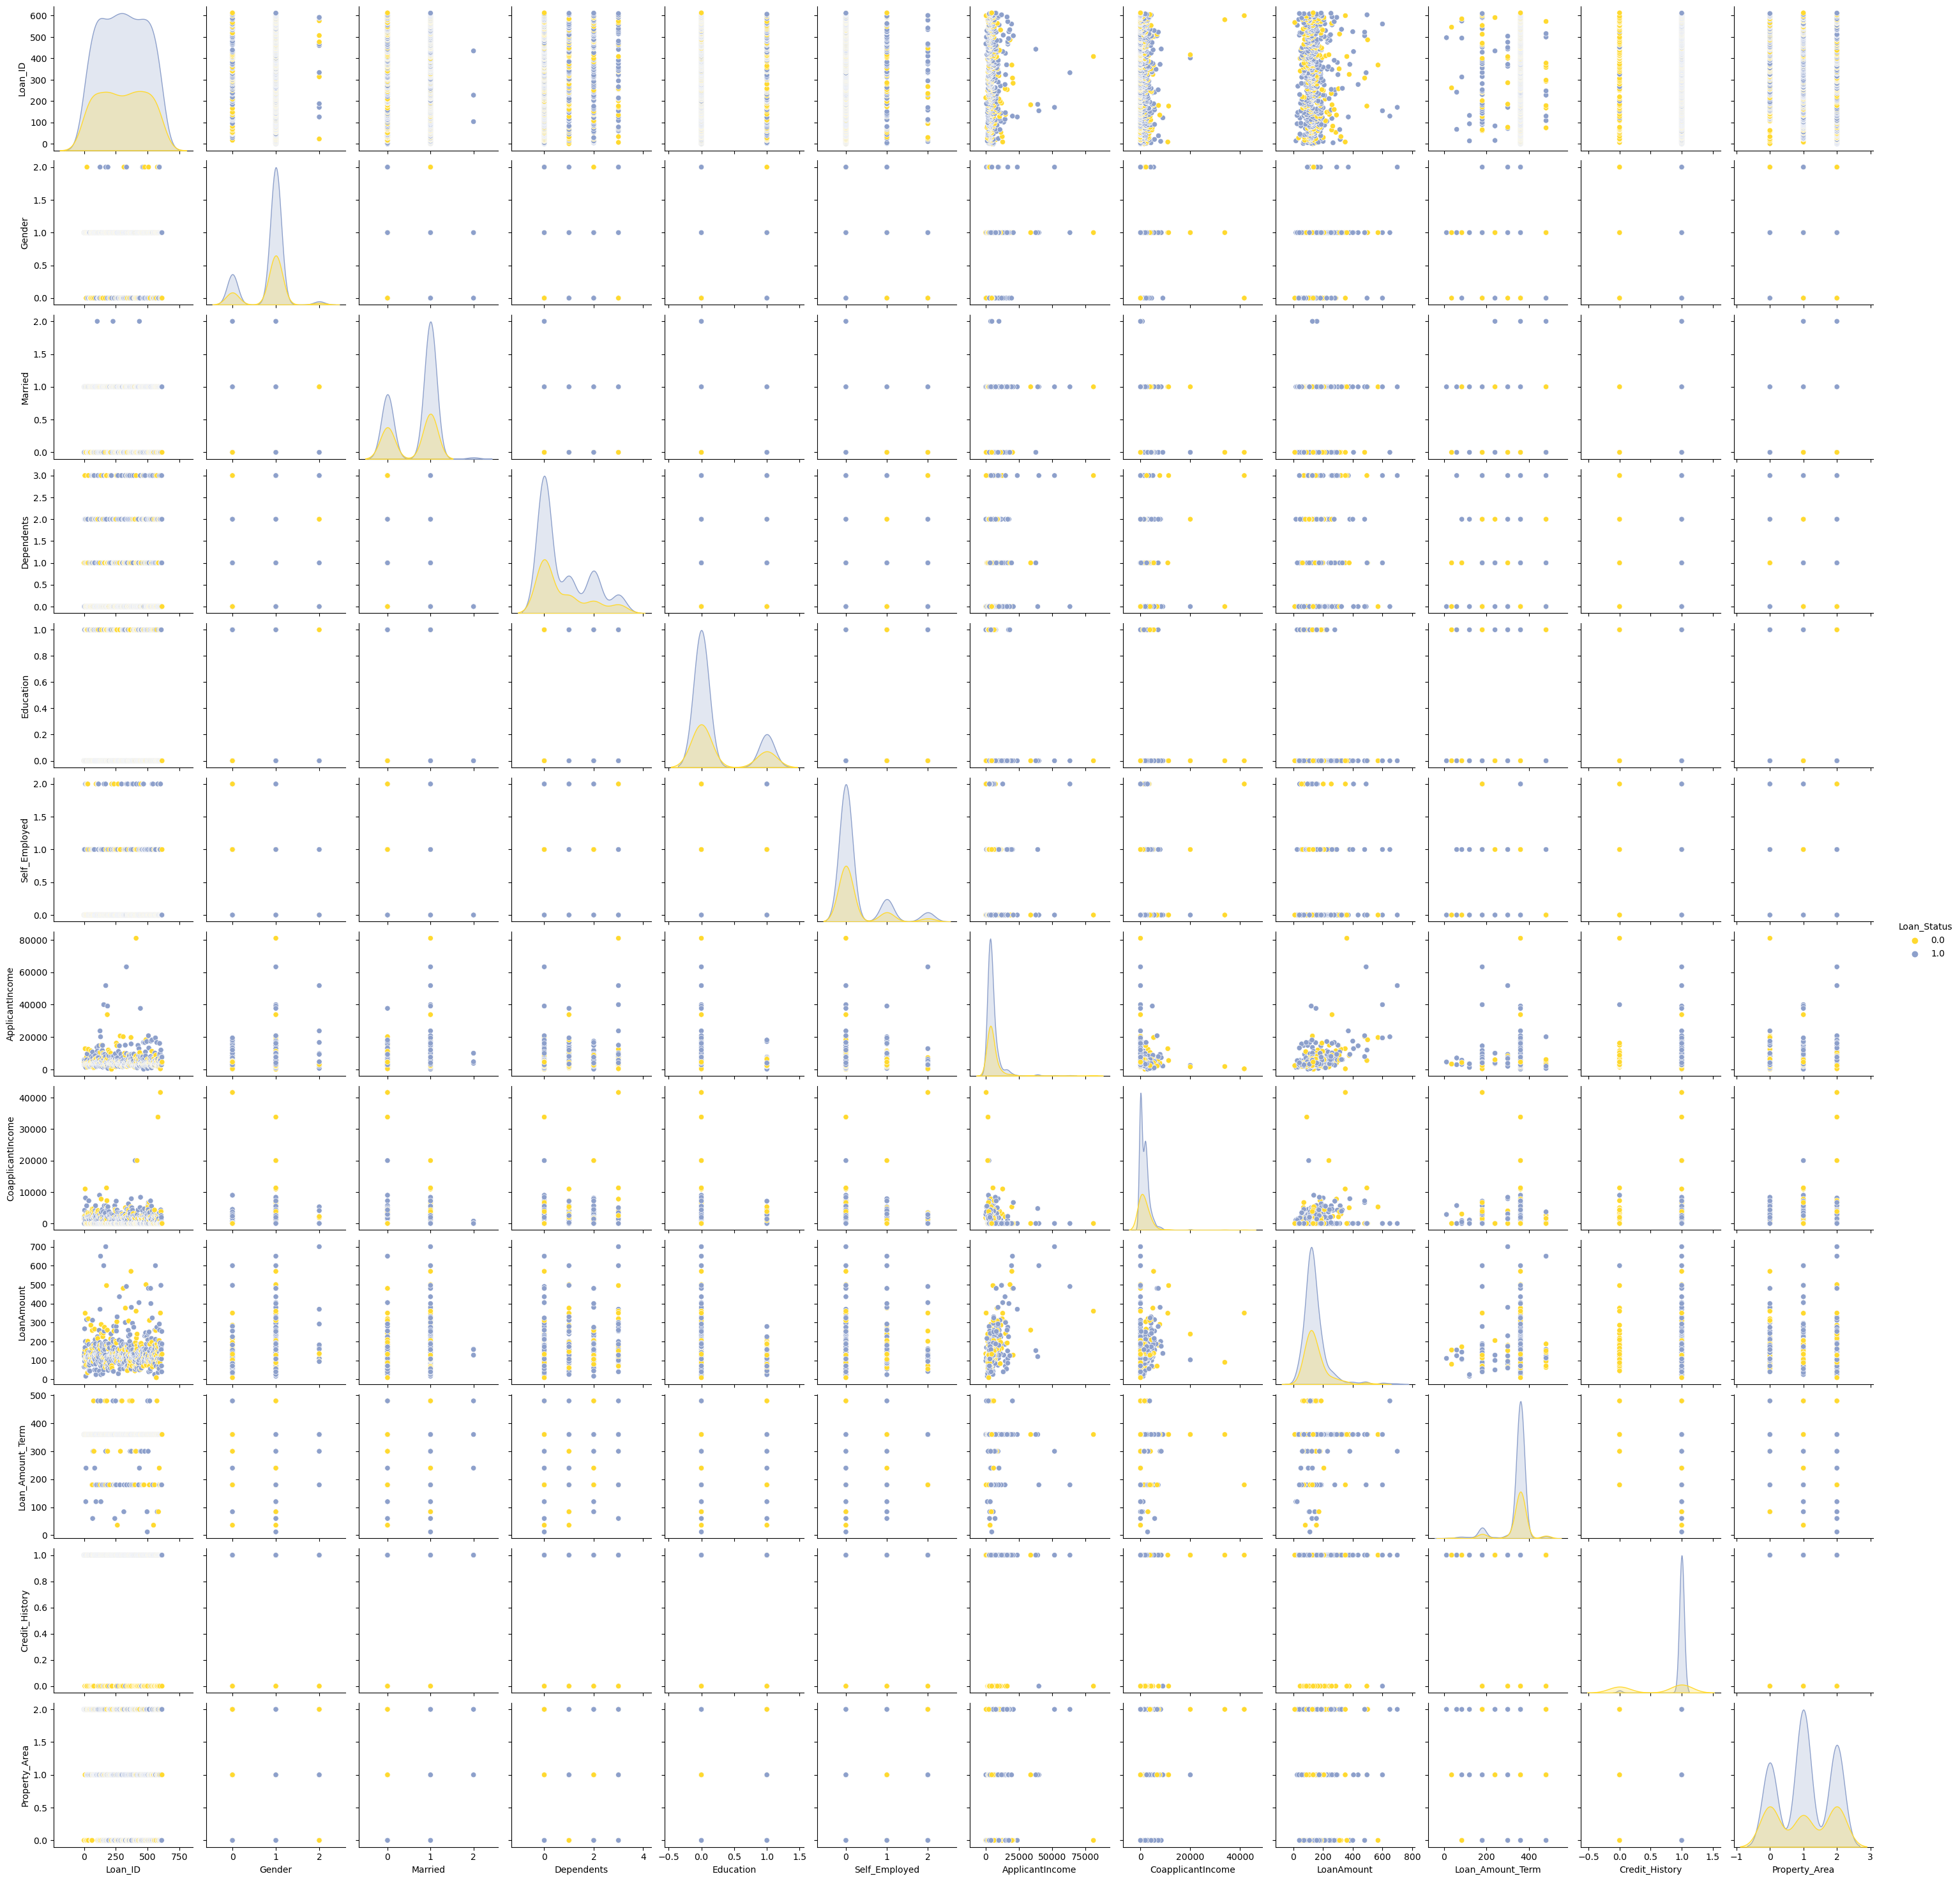

In [76]:
sns.pairplot(loan_data, hue='Loan_Status', palette='Set2_r')
plt.show()

no conclusive statements can be made from the above plots.

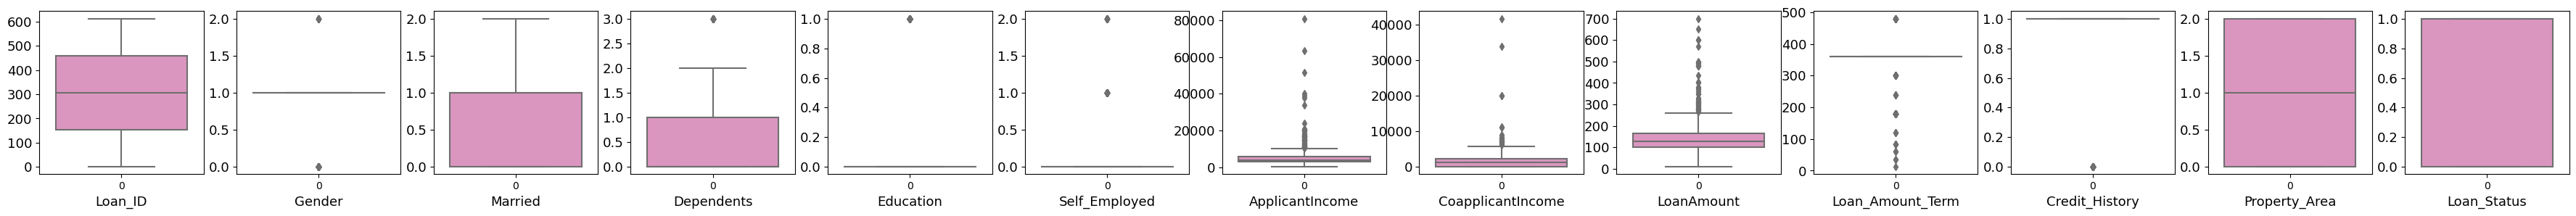

In [77]:
plt.figure(figsize=(45,45),facecolor = "white")
plotnumber=1
for col in loan_data:
    if plotnumber<=14:
        wc=plt.subplot(13,13,plotnumber)
        sns.boxplot(loan_data[col],palette="Set2_r")
        plt.xlabel(col,rotation=0,fontsize = 13)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

below are the following details from the above boxplots-

1) gender, dependents, self-employed,applicantincome, co applicant income,loan amount, loan amount term, and credit history have outliers above the 75th percetile of their values in their repsective column.
2) gender and loan amount term has outliers below 25th percentiles of their values in their repsective columns.
3) rest of the colum ns have no or very few outliers.

In [ ]:
Skewness of the data

In [78]:
loan_data.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.015551
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

lets fix the skewness of the data using cbrt method for ApplicantIncome and CoapplicantIncome.

In [79]:
loan_data['ApplicantIncome']=np.cbrt(loan_data['ApplicantIncome'])
loan_data['CoapplicantIncome']=np.cbrt(loan_data['CoapplicantIncome'])

lets again check for skewness.

In [80]:
loan_data.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.015551
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

distribution plot of the output column.

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_10420\970024390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['Loan_Status'],color="b", kde_kws={"shade":True}, hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


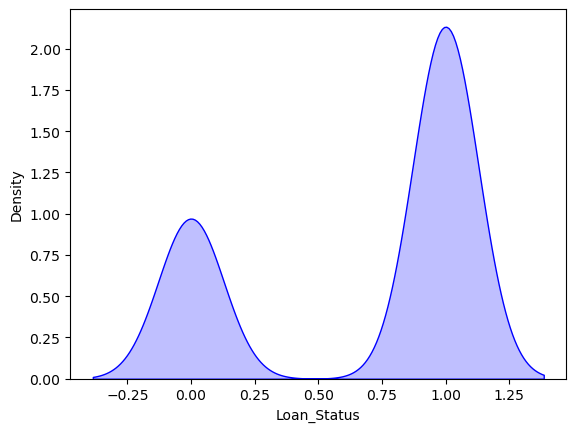

In [81]:
sns.distplot(loan_data['Loan_Status'],color="b", kde_kws={"shade":True}, hist=False)
plt.show()

We can see the values in loan status is highly skewed to the right(loan approved) than to the left(not approved).

lets encode all the values in all the columns to float values using the ordinal encoder method.

In [82]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in loan_data.columns:
    if loan_data[i].dtypes=='int64':
        loan_data[i]=OE.fit_transform(loan_data[i].values.reshape(-1,1))
loan_data

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0.0     1.0      0.0         0.0        0.0            0.0   
1        1.0     1.0      1.0         1.0        0.0            0.0   
2        2.0     1.0      1.0         0.0        0.0            1.0   
3        3.0     1.0      1.0         0.0        1.0            0.0   
4        4.0     1.0      0.0         0.0        0.0            0.0   
..       ...     ...      ...         ...        ...            ...   
609    609.0     0.0      0.0         0.0        0.0            0.0   
610    610.0     1.0      1.0         3.0        0.0            0.0   
611    611.0     1.0      1.0         1.0        0.0            0.0   
612    612.0     1.0      1.0         2.0        0.0            0.0   
613    613.0     0.0      0.0         0.0        0.0            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          18.017473           0.000000       128.0             360.0   
1          16.610522          11.467457       128.0             360.0   
2          14.422496           0.000000        66.0             360.0   
3          13.720654          13.310098       120.0             360.0   
4          18.171206           0.000000       141.0             360.0   
..               ...                ...         ...               ...   
609        14.260431           0.000000        71.0             360.0   
610        16.013010           0.000000        40.0             180.0   
611        20.059821           6.214465       253.0             360.0   
612        19.646281           0.000000       187.0             360.0   
613        16.610522           0.000000       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0            2.0          1.0  
1               1.0            0.0          0.0  
2               1.0            2.0          1.0  
3               1.0            2.0          1.0  
4               1.0            2.0          1.0  
..              ...            ...          ...  
609             1.0            0.0          1.0  
610             1.0            0.0          1.0  
611             1.0            2.0          1.0  
612             1.0            2.0          1.0  
613             0.0            1.0          0.0  

[614 rows x 13 columns]

Correlations

In [83]:
correlation = loan_data.corr()
correlation

Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000 -0.007403 -0.018621    0.051559   0.039442   
Gender            -0.007403  1.000000  0.336094    0.175026   0.024382   
Married           -0.018621  0.336094  1.000000    0.320851   0.006759   
Dependents         0.051559  0.175026  0.320851    1.000000   0.055752   
Education          0.039442  0.024382  0.006759    0.055752   1.000000   
Self_Employed      0.005039 -0.025022 -0.038153    0.025177  -0.021130   
ApplicantIncome    0.017662  0.098541  0.037746    0.122477  -0.181428   
CoapplicantIncome -0.013743  0.189959  0.268833   -0.004252   0.010615   
LoanAmount         0.036872  0.135505  0.144297    0.163103  -0.168759   
Loan_Amount_Term  -0.033028 -0.068522 -0.096368   -0.103864  -0.073928   
Credit_History    -0.030603 -0.003844  0.014896   -0.040160  -0.073658   
Property_Area     -0.155416 -0.030903  0.007973   -0.000244  -0.065243   
Loan_Status        0.011773  0.008690  0.096657    0.010118  -0.085884   

                   Self_Employed  ApplicantIncome  CoapplicantIncome  \
Loan_ID                 0.005039         0.017662          -0.013743   
Gender                 -0.025022         0.098541           0.189959   
Married                -0.038153         0.037746           0.268833   
Dependents              0.025177         0.122477          -0.004252   
Education              -0.021130        -0.181428           0.010615   
Self_Employed           1.000000         0.097355          -0.024283   
ApplicantIncome         0.097355         1.000000          -0.325066   
CoapplicantIncome      -0.024283        -0.325066           1.000000   
LoanAmount              0.089886         0.599467           0.105643   
Loan_Amount_Term       -0.036361        -0.035847          -0.002645   
Credit_History          0.062019         0.009937           0.005038   
Property_Area          -0.013439        -0.024827          -0.052318   
Loan_Status             0.010880         0.004341           0.033582   

                   LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID              0.036872         -0.033028       -0.030603   
Gender               0.135505         -0.068522       -0.003844   
Married              0.144297         -0.096368        0.014896   
Dependents           0.163103         -0.103864       -0.040160   
Education           -0.168759         -0.073928       -0.073658   
Self_Employed        0.089886         -0.036361        0.062019   
ApplicantIncome      0.599467         -0.035847        0.009937   
CoapplicantIncome    0.105643         -0.002645        0.005038   
LoanAmount           1.000000          0.036960       -0.000607   
Loan_Amount_Term     0.036960          1.000000       -0.004705   
Credit_History      -0.000607         -0.004705        1.000000   
Property_Area       -0.046632         -0.076120        0.001963   
Loan_Status         -0.033214         -0.022549        0.540556   

                   Property_Area  Loan_Status  
Loan_ID                -0.155416     0.011773  
Gender                 -0.030903     0.008690  
Married                 0.007973     0.096657  
Dependents             -0.000244     0.010118  
Education              -0.065243    -0.085884  
Self_Employed          -0.013439     0.010880  
ApplicantIncome        -0.024827     0.004341  
CoapplicantIncome      -0.052318     0.033582  
LoanAmount             -0.046632    -0.033214  
Loan_Amount_Term       -0.076120    -0.022549  
Credit_History          0.001963     0.540556  
Property_Area           1.000000     0.032112  
Loan_Status             0.032112     1.000000

lets visualise the correlations using the heatmap method.

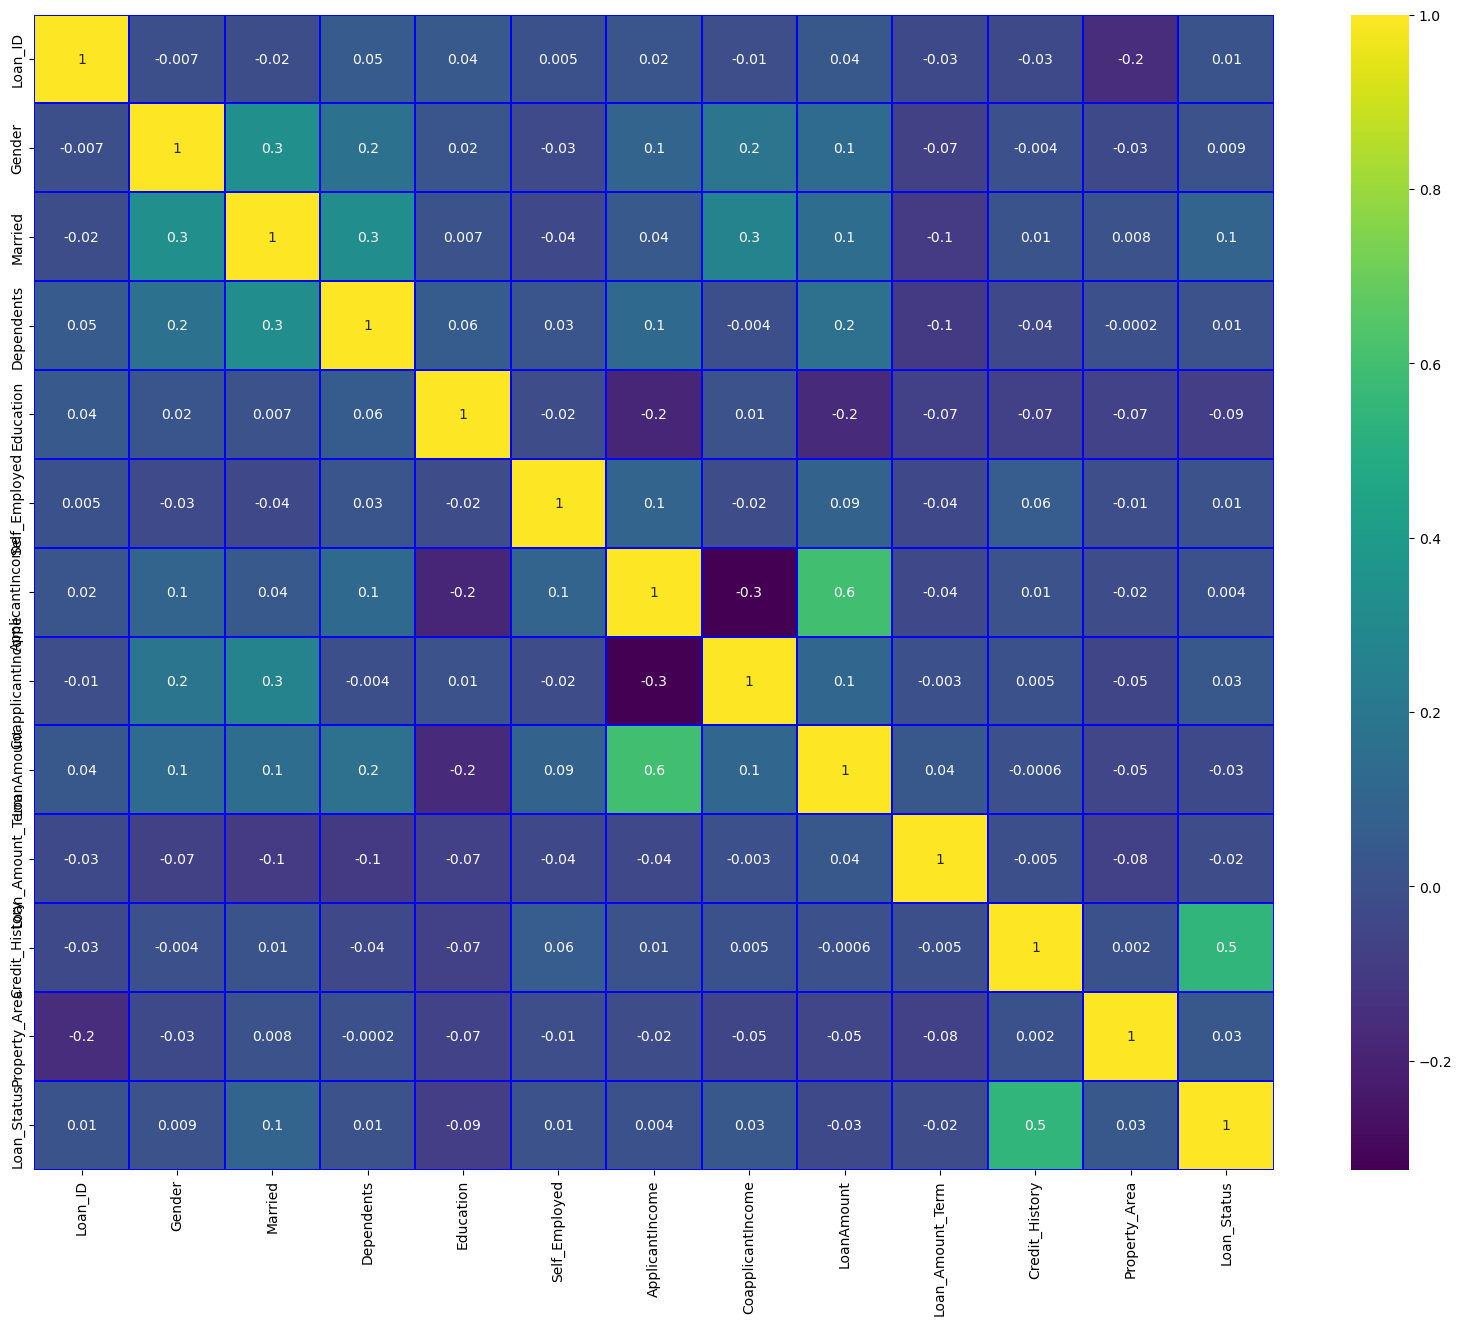

In [84]:
plt.figure(figsize = (20,15))
sns.heatmap(loan_data.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")
plt.yticks(rotation=90);
plt.show()

Below are the findings from the above map-

1) Applicant income and co applicant income are negatively correlated to each other.
2) Credit history is positively correlated to loan_status.
3) Applicant income is positively correlated to loan amount.
4) gender, married and dependants are positively correlated to each other.
4) Rest of the columns have weak or almost no correlations.

lets sort the correlations with our output column

In [85]:
correlation['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.096657
CoapplicantIncome    0.033582
Property_Area        0.032112
Loan_ID              0.011773
Self_Employed        0.010880
Dependents           0.010118
Gender               0.008690
ApplicantIncome      0.004341
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
Education           -0.085884
Name: Loan_Status, dtype: float64

In [ ]:
lets visualise using boxplots.

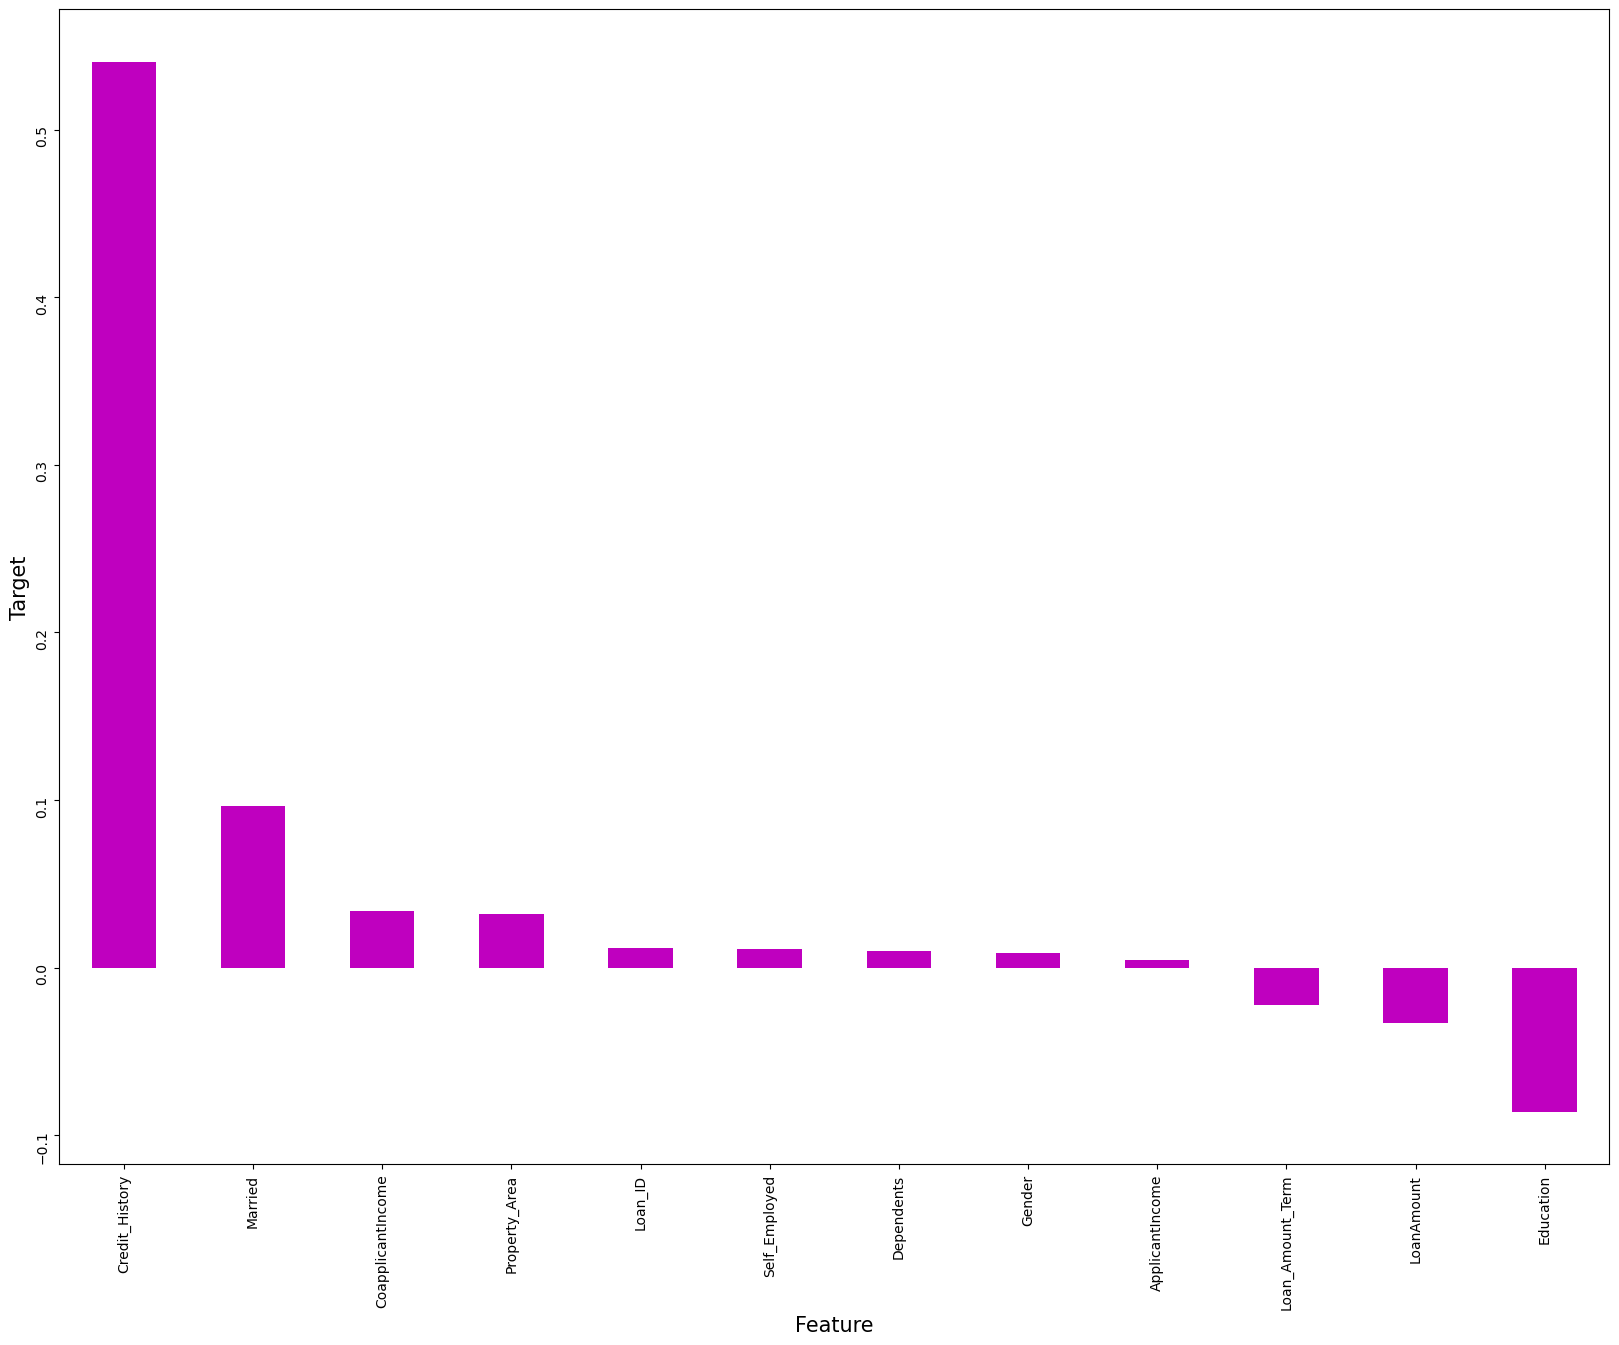

In [86]:
plt.figure(figsize = (20,15))
correlation['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.yticks(rotation=90);
plt.show()

lets now scale the data using the standard scaler after declaring the x and y variables

In [87]:
x = loan_data.drop("Loan_Status", axis=1)
y = loan_data["Loan_Status"]

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0   -1.729232  0.382616 -1.357847   -0.737806  -0.528362      -0.445039   
1   -1.723590  0.382616  0.705812    0.253470  -0.528362      -0.445039   
2   -1.717948  0.382616  0.705812   -0.737806  -0.528362       1.426564   
3   -1.712307  0.382616  0.705812   -0.737806   1.892641      -0.445039   
4   -1.706665  0.382616 -1.357847   -0.737806  -0.528362      -0.445039   
..        ...       ...       ...         ...        ...            ...   
609  1.706665 -1.990376 -1.357847   -0.737806  -0.528362      -0.445039   
610  1.712307  0.382616  0.705812    2.236021  -0.528362      -0.445039   
611  1.717948  0.382616  0.705812    0.253470  -0.528362      -0.445039   
612  1.723590  0.382616  0.705812    1.244745  -0.528362      -0.445039   
613  1.729232 -1.990376 -1.357847   -0.737806  -0.528362       1.426564   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.380325          -1.053225   -0.211241          0.273231   
1           0.022870           0.561256   -0.211241          0.273231   
2          -0.533028          -1.053225   -0.948996          0.273231   
3          -0.711341           0.820678   -0.306435          0.273231   
4           0.419383          -1.053225   -0.056551          0.273231   
..               ...                ...         ...               ...   
609        -0.574203          -1.053225   -0.889500          0.273231   
610        -0.128936          -1.053225   -1.258378         -2.522836   
611         0.899211          -0.178302    1.276168          0.273231   
612         0.794146          -1.053225    0.490816          0.273231   
613         0.022870          -1.053225   -0.151745          0.273231   

     Credit_History  Property_Area  
0          0.411733       1.223298  
1          0.411733      -1.318513  
2          0.411733       1.223298  
3          0.411733       1.223298  
4          0.411733       1.223298  
..              ...            ...  
609        0.411733      -1.318513  
610        0.411733      -1.318513  
611        0.411733       1.223298  
612        0.411733       1.223298  
613       -2.428760      -0.047607  

[614 rows x 12 columns]

vif values

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values           Features
0     1.033967            Loan_ID
1     1.175638             Gender
2     1.318286            Married
3     1.172528         Dependents
4     1.068957          Education
5     1.020949      Self_Employed
6     2.132794    ApplicantIncome
7     1.479598  CoapplicantIncome
8     1.907417         LoanAmount
9     1.042568   Loan_Amount_Term
10    1.012685     Credit_History
11    1.044558      Property_Area

now lets remove the columns with very low correlations

In [91]:
columns_with_low_corelation_and_high_VIF = ['Loan_ID','Self_Employed','Dependents','Gender','ApplicantIncome','Loan_Amount_Term']
loan_data = loan_data.drop(columns=columns_with_low_corelation_and_high_VIF)

lets scale the data again and repeat the same process to check the vif values of our new dataframe.

In [92]:
x = loan_data.drop("Loan_Status", axis=1)
y = loan_data["Loan_Status"]

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Married  Education  CoapplicantIncome  LoanAmount  Credit_History  \
0   -1.357847  -0.528362          -1.053225   -0.211241        0.411733   
1    0.705812  -0.528362           0.561256   -0.211241        0.411733   
2    0.705812  -0.528362          -1.053225   -0.948996        0.411733   
3    0.705812   1.892641           0.820678   -0.306435        0.411733   
4   -1.357847  -0.528362          -1.053225   -0.056551        0.411733   
..        ...        ...                ...         ...             ...   
609 -1.357847  -0.528362          -1.053225   -0.889500        0.411733   
610  0.705812  -0.528362          -1.053225   -1.258378        0.411733   
611  0.705812  -0.528362          -0.178302    1.276168        0.411733   
612  0.705812  -0.528362          -1.053225    0.490816        0.411733   
613 -1.357847  -0.528362          -1.053225   -0.151745       -2.428760   

     Property_Area  
0         1.223298  
1        -1.318513  
2         1.223298  
3         1.223298  
4         1.223298  
..             ...  
609      -1.318513  
610      -1.318513  
611       1.223298  
612       1.223298  
613      -0.047607  

[614 rows x 6 columns]

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values           Features
0    1.095903            Married
1    1.042418          Education
2    1.086668  CoapplicantIncome
3    1.061512         LoanAmount
4    1.005966     Credit_History
5    1.010775      Property_Area

now that the vif values are corrected and columns with low correlation removed, lets balance the y value counts in order for us to do the classification task. We will be using smote analysis in order to execute the task. 

In [95]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [96]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [97]:
y1.value_counts()

1.0    422
0.0    422
Name: Loan_Status, dtype: int64

z-scores

In [99]:
from scipy.stats import zscore
out_features=loan_data[['Married', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area']]
z=np.abs(zscore(out_features))
z

Married  Education  CoapplicantIncome  LoanAmount  Credit_History  \
0    1.357847   0.528362           1.053225    0.211241        0.411733   
1    0.705812   0.528362           0.561256    0.211241        0.411733   
2    0.705812   0.528362           1.053225    0.948996        0.411733   
3    0.705812   1.892641           0.820678    0.306435        0.411733   
4    1.357847   0.528362           1.053225    0.056551        0.411733   
..        ...        ...                ...         ...             ...   
609  1.357847   0.528362           1.053225    0.889500        0.411733   
610  0.705812   0.528362           1.053225    1.258378        0.411733   
611  0.705812   0.528362           0.178302    1.276168        0.411733   
612  0.705812   0.528362           1.053225    0.490816        0.411733   
613  1.357847   0.528362           1.053225    0.151745        2.428760   

     Property_Area  
0         1.223298  
1         1.318513  
2         1.223298  
3         1.223298  
4         1.223298  
..             ...  
609       1.318513  
610       1.318513  
611       1.223298  
612       1.223298  
613       0.047607  

[614 rows x 6 columns]

lets check all the rows whose z score is above 3/-3

In [100]:
np.where(z>3)

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
        561, 581, 600, 604], dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3], dtype=int64))

lets remove all the rows with z score above 3/-3 and check the shape oof our new dataframe.

In [102]:
loan_data_new=loan_data[(z<3).all(axis=1)]
loan_data_new.shape

(597, 7)

lets check the data loss percentage after removing all the unnecesary rows

In [103]:
data_loss_percentage = ((loan_data.shape[0] - loan_data_new.shape[0]) / loan_data.shape[0]) * 100
print("Data Loss Percentage:", data_loss_percentage)

Data Loss Percentage: 2.768729641693811


the data loss percentage is under the limits, now lets balance the y value counts of our new dataframe using smote analysis.

In [106]:
x = loan_data_new.drop("Loan_Status", axis=1)
y = loan_data_new["Loan_Status"]

In [107]:
y.value_counts()

1.0    411
0.0    186
Name: Loan_Status, dtype: int64

In [108]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [109]:
y1.value_counts()

1.0    411
0.0    411
Name: Loan_Status, dtype: int64

Predictions.

lets first import all the packages that are necessary in order for us to do the classification tasks.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

lets find the best accuracy score of the maximum random stater using the random forest classifier using a 70-30 split in the dataframe.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccuracy = 0
maxrandomstate = 0
for i in range(1,200):
      x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=i)
      RFC = RandomForestClassifier()
      RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxaccuracy:
    maxaccuracy=acc
    maxrandomstate=i
print("the best accuracy score",maxaccuracy,"at the following random state",maxrandomstate)

the best accuracy score 0.8380566801619433 at the following random state 199


So we found out that the best accuracy score 0.8380566801619433 at the following random state 199.

Now lets train our model using the above fidnings.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=maxrandomstate)

now we will be using the RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, support vector classifier, and LogisticRegression for findign the best model.

In [112]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8380566801619433
[[104  25]
 [ 15 103]]
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       129
         1.0       0.80      0.87      0.84       118

    accuracy                           0.84       247
   macro avg       0.84      0.84      0.84       247
weighted avg       0.84      0.84      0.84       247



Random forest classifier gives an accuracy score of 0.8380566801619 with a precision, recall and f1 score ranging from .81 to .87.

In [113]:
LogReg = LogisticRegression(max_iter=6000)
LogReg.fit(x_train,y_train)
predLogReg=LogReg.predict(x_test)
print(accuracy_score(y_test, predLogReg))
print(confusion_matrix(y_test,predLogReg))
print(classification_report(y_test,predLogReg))

0.757085020242915
[[ 76  53]
 [  7 111]]
              precision    recall  f1-score   support

         0.0       0.92      0.59      0.72       129
         1.0       0.68      0.94      0.79       118

    accuracy                           0.76       247
   macro avg       0.80      0.76      0.75       247
weighted avg       0.80      0.76      0.75       247



Logistic Regression gives an accuracy score of 0.7570850202429  with a precision, recall and f1 score ranging from .59 to .92.

In [114]:
GradBoos = GradientBoostingClassifier()
GradBoos.fit(x_train,y_train)
predGradBoos=GradBoos.predict(x_test)
print(accuracy_score(y_test, predGradBoos))
print(confusion_matrix(y_test,predGradBoos))
print(classification_report(y_test,predGradBoos))

0.8178137651821862
[[ 94  35]
 [ 10 108]]
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81       129
         1.0       0.76      0.92      0.83       118

    accuracy                           0.82       247
   macro avg       0.83      0.82      0.82       247
weighted avg       0.83      0.82      0.82       247



Gradient Boosting Classifier gives an accuracy score of 0.8178137651 with a precision, recall and f1 score ranging from .73 to .90.

In [115]:
BagClass = BaggingClassifier()
BagClass.fit(x_train,y_train)
predBagClass=BagClass.predict(x_test)
print(accuracy_score(y_test, predBagClass))
print(confusion_matrix(y_test,predBagClass))
print(classification_report(y_test,predBagClass))

0.8178137651821862
[[105  24]
 [ 21  97]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       129
         1.0       0.80      0.82      0.81       118

    accuracy                           0.82       247
   macro avg       0.82      0.82      0.82       247
weighted avg       0.82      0.82      0.82       247



Bagging Classifier gives an accuracy score of 0.817813765182 with a precision, recall and f1 score ranging from .81 to .83.

In [116]:
Extrees = ExtraTreesClassifier()
Extrees.fit(x_train,y_train)
predExtrees=Extrees.predict(x_test)
print(accuracy_score(y_test, predExtrees))
print(confusion_matrix(y_test,predExtrees))
print(classification_report(y_test,predExtrees))

0.8218623481781376
[[104  25]
 [ 19  99]]
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       129
         1.0       0.80      0.84      0.82       118

    accuracy                           0.82       247
   macro avg       0.82      0.82      0.82       247
weighted avg       0.82      0.82      0.82       247



ExtraTreesClassifier gives an accuracy score of 0.82186234817 with a precision, recall and f1 score ranging from .81 to .85.

In [117]:
SVC = SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test, predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC,zero_division=1))

0.4331983805668016
[[30 99]
 [41 77]]
              precision    recall  f1-score   support

         0.0       0.42      0.23      0.30       129
         1.0       0.44      0.65      0.52       118

    accuracy                           0.43       247
   macro avg       0.43      0.44      0.41       247
weighted avg       0.43      0.43      0.41       247



SVC gives an accuracy score of 0.43319838056 with a precision, recall and f1 score ranging from .23 to .42.

In [118]:
AdaBoos = AdaBoostClassifier()
AdaBoos.fit(x_train,y_train)
Adapred=AdaBoos.predict(x_test)
print(accuracy_score(y_test, Adapred))
print(confusion_matrix(y_test,Adapred))
print(classification_report(y_test,Adapred))

0.8016194331983806
[[ 92  37]
 [ 12 106]]
              precision    recall  f1-score   support

         0.0       0.88      0.71      0.79       129
         1.0       0.74      0.90      0.81       118

    accuracy                           0.80       247
   macro avg       0.81      0.81      0.80       247
weighted avg       0.82      0.80      0.80       247



AdaBoostClassifier gives an accuracy score of 0.801619433198 with a precision, recall and f1 score ranging from .71 to .88.

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print("Classification Report:")
print(classification_report(y_test, pred))

Accuracy Score: 0.6153846153846154
Confusion Matrix:
[[85 44]
 [51 67]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.66      0.64       129
         1.0       0.60      0.57      0.59       118

    accuracy                           0.62       247
   macro avg       0.61      0.61      0.61       247
weighted avg       0.61      0.62      0.61       247



KNeighborsClassifier gives an accuracy score of 0.6153846153 with a precision, recall and f1 score ranging from .62 to .66.

lets get the r2 score of logistic regression by comparing the predicted values with the true values

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
LogRegmodel = LogisticRegression(max_iter=1000)
LogRegmodel.fit(x_train, y_train)
true_values = y_test
predicted_values = LogRegmodel.predict(x_test)

In [121]:
predicted_values

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])

In [122]:
from sklearn.metrics import r2_score
predicted_values = [1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1.]
true_values = [0.,1.,1.,1.,1.,1.,0.,1.,0.,1.,1.,1.,0.,1.,1.,1.,0.,0.,1.,0.]
r2 = r2_score(true_values, predicted_values)
print("R2 Score:", r2)

R2 Score: -0.5384615384615385


we get an r2 score of 0.5384615384 for logistic regression.

Cross validation score.

In [123]:
X = x
y = y
classifier = ExtraTreesClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.70833333 0.7        0.72268908 0.72268908 0.70588235]
Mean Score: 0.7119187675070029
Standard Deviation: 0.00920162737834653


In [124]:
X = x
y = y
classifier = BaggingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.75833333 0.70833333 0.72268908 0.76470588 0.71428571]
Mean Score: 0.733669467787115
Standard Deviation: 0.023279965264430356


In [125]:
X = x
y = y
classifier = GradientBoostingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.775      0.74166667 0.78991597 0.83193277 0.79831933]
Mean Score: 0.7873669467787116
Standard Deviation: 0.029509395117342702


In [126]:
X = x
y = y
classifier = RandomForestClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.775      0.73333333 0.73109244 0.74789916 0.76470588]
Mean Score: 0.750406162464986
Standard Deviation: 0.017205379295364174


In [127]:
X = x
y = y
classifier = LogisticRegression(max_iter=1000)
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [ 0.10126994 -0.0012837  -0.01977587  0.37244562  0.17633487]
Mean Score: 0.12579817239328206
Standard Deviation: 0.14236021767152246


In [128]:
from sklearn.svm import SVC
X = x
y = y
classifier = SVC()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.69166667 0.68333333 0.68907563 0.68907563 0.68907563]
Mean Score: 0.6884453781512606
Standard Deviation: 0.0027459553911826167


In [129]:
X = x
y = y
classifier = AdaBoostClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.76666667 0.78333333 0.76470588 0.84033613 0.78151261]
Mean Score: 0.7873109243697478
Standard Deviation: 0.027561886519714262


In [130]:
X = x
y = y
classifier = KNeighborsClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.65833333 0.65833333 0.6302521  0.58823529 0.68067227]
Mean Score: 0.6431652661064426
Standard Deviation: 0.03178354116772343


After thorough analysis of cv score and accuracy scores, we found that the best classifier is adaboost with the least difference between accuracy score and cv score being 0.013.

Hyperpaprameter tuning

lets hyperparmeter tune our adaboost classifier model using the parameters- 'n_estimators': [50, 100, 200, 300],'learning_rate': [0.1, 0.5, 1.0],'algorithm': ['SAMME', 'SAMME.R'],'random_state': [10, 50, 1000], and find the best parameters. 

In [131]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 200, 300],'learning_rate': [0.1, 0.5, 1.0],'algorithm': ['SAMME', 'SAMME.R'],'random_state': [10, 50, 1000]}

In [132]:
GSCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [133]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 50, 1000]})

In [ ]:
below is the loist of paramters we will be using to tune our selected model.

In [134]:
GSCV.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.1,
 'n_estimators': 50,
 'random_state': 10}

In [ ]:
lets get he accuracy score of our selected model.

In [136]:
Selected_model = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.1,n_estimators= 50,random_state= 10)
Selected_model.fit(x_train,y_train)
pred = Selected_model.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(accuracy*100)

83.33333333333334


We got an accuracy score of 83.33333333333334.

ROC-AUC Curve.

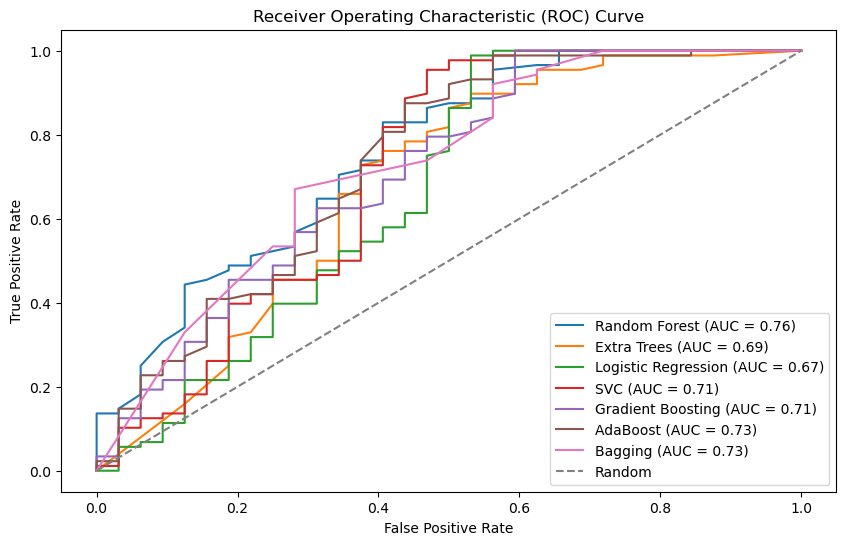

Random Forest: ROC AUC = 0.76
Extra Trees: ROC AUC = 0.69
Logistic Regression: ROC AUC = 0.67
SVC: ROC AUC = 0.71
Gradient Boosting: ROC AUC = 0.71
AdaBoost: ROC AUC = 0.73
Bagging: ROC AUC = 0.73


In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC(probability=True)),  
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier())
]


roc_auc_scores = {}


plt.figure(figsize=(10, 6))
for classifiername, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_pred_probability = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    roc_auc = roc_auc_score(y_test, y_pred_probability)
    roc_auc_scores[classifiername] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{classifiername} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


for name, roc_auc in roc_auc_scores.items():
    print(f'{name}: ROC AUC = {roc_auc:.2f}')

our selcted models roc auc score is .73 and the best score is for rfr with .76.

Saving the model

We will be using the joblib method to save our slected model

In [138]:
import joblib
joblib.dump(Selected_model,"loan_application_Data_Analysis.pkl")

['loan_application_Data_Analysis.pkl']

In [139]:
model = joblib.load("loan_application_Data_Analysis.pkl")
prediction = model.predict(x_test)
prediction

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1.])

lets compare the predicted score with the original values.

In [140]:
finaldata = np.array(y_test)
loantype = pd.DataFrame()
loantype["ourprediction"] = prediction
loantype["originalvalues"] = finaldata
loantype

ourprediction  originalvalues
0              1.0             1.0
1              1.0             1.0
2              1.0             0.0
3              1.0             0.0
4              1.0             0.0
..             ...             ...
115            1.0             1.0
116            1.0             1.0
117            1.0             0.0
118            1.0             1.0
119            1.0             1.0

[120 rows x 2 columns]

In [ ]:
We can see that our model has performed well, which leads to the conclusion of the project.